Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

import os
from os import listdir
from os.path import isfile, join
import glob
pd.set_option('display.max_columns', 50)

#### Read all files, sum properties, and plot

Households

In [6]:
households = pd.read_csv("..\Datalogs\Households.csv")
cons_firms = pd.read_csv("..\Datalogs\Consumer_Firms.csv")
cap_firms = pd.read_csv("..\Datalogs\Capital_Firms.csv")
pboard = pd.read_csv("..\Datalogs\Public_Info_Board.csv")

In [ ]:
cons_firms

Take averages

In [34]:
timestep = households.
households_average = households.apply(lambda x: x/n_households)
cons_firms_average = cons_firms.apply(lambda x: x/n_cons_firms)
cap_firms_average = cap_firms.apply(lambda x: x/n_cap_firms)

Set timestep

In [36]:
t = np.linspace(0,36,37)
t

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36.])

### Check data and fix smt up

In [37]:
households.head()

wealth_human  expenditure_consumption  expenditure_tax  \
0      295055.0                      0.0              0.0   
1      296816.0                 608698.0              0.0   
2      321865.0                 550951.0              0.0   
3      325187.0                 547043.0              0.0   
4      329051.0                 563917.0              0.0   

   consumption_propensity  new_savings  cash_on_hand_real_desired  \
0              294.064069          0.0                        0.0   
1              294.064069       1761.0                        0.0   
2              294.064069      26810.0                        0.0   
3              294.064069      30132.0                        0.0   
4              294.064069      33996.0                        0.0   

   cash_on_hand_desired  cash_on_hand_current  saving_propensity  \
0                   0.0                   0.0         118.447734   
1              178397.0                   0.0         139.647736   
2              141197.0                   0.0         119.747734   
3              139689.0                   0.0         119.947734   
4              138442.0                   0.0         119.347734   

   saving_propensity_optimist  saving_propensity_pessimist  income_current  \
0                  118.447734                   178.447743             0.0   
1                  118.447734                   178.447743        789431.0   
2                  118.447734                   178.447743        689715.0   
3                  118.447734                   178.447743        685754.0   
4                  118.447734                   178.447743        707932.0   

   income_average  income_wage  income_unemployment_benefit  \
0             0.0          0.0                          0.0   
1        789431.0     789431.0                          0.0   
2        727628.0     698773.0                          0.0   
3        718710.0     691806.0                          0.0   
4        711690.0     710646.0                          0.0   

   income_gov_transfers  income_firm_owner_dividend  unemployed  \
0                   0.0                         0.0        19.0   
1                   0.0                         0.0        25.0   
2                   0.0                         0.0        22.0   
3                   0.0                         0.0        18.0   
4                   0.0                         0.0        13.0   

   reservation_wage  unemp_duration  unemp_duration_upper_bound  \
0          560385.0             0.0                      2106.0   
1          560274.0            50.0                      2106.0   
2          551722.0           422.0                      2106.0   
3          550989.0           386.0                      2106.0   
4          550450.0           288.0                      2106.0   

   positive_sentiment  business_owner         c_f         c_h  c_excess_money  \
0               600.0             0.0  296.895452  118.447734      178.447743   
1               388.0             0.0  296.895452  118.447734      178.447743   
2               587.0             0.0  296.895452  118.447734      178.447743   
3               585.0             0.0  296.895452  118.447734      178.447743   
4               591.0             0.0  296.895452  118.447734      178.447743   

   p_majority_op_adoption  
0              177.220252  
1              177.220252  
2              177.220252  
3              177.220252  
4              177.220252

In [38]:
cons_firms.head()

production_current  production_planned  production_past  quantity_sold  \
0            593800.0                 0.0              0.0       219900.0   
1            444609.0            470172.0              0.0       219900.0   
2         -18041829.0         -17504279.0              0.0     -8871768.0   
3         -38797729.0         -38182619.0              0.0    -17997954.0   
4         -89428700.0         -88742831.0              0.0    -38755759.0   

   total_income  revenue_sales  new_loan_issuance  subsidies  \
0           0.0            0.0                0.0        0.0   
1           0.0      2295203.0                0.0        0.0   
2           0.0   -100185657.0                0.0        0.0   
3           0.0   -210668086.0                0.0        0.0   
4           0.0   -509347068.0                0.0        0.0   

   good_price_current  good_price_past  total_liabilities  labor_wage_bill  \
0           994.43789        950.00000                0.0         639251.0   
1          1090.76612        994.43789                0.0        1367853.0   
2          1392.50336       1364.37590                0.0        6551167.0   
3          1465.10332       1392.50336                0.0        7015378.0   
4          1542.02987       1465.10332                0.0        7547399.0   

   capital_costs  tax_payments  debt_principal_payments  \
0            0.0           0.0                      0.0   
1            0.0           0.0                      0.0   
2            0.0           0.0                      0.0   
3            0.0           0.0                      0.0   
4            0.0           0.0                      0.0   

   debt_interest_payments  dividend_payments  total_assets  leverage_ratio  \
0                     0.0                0.0      992996.0             0.0   
1                     0.0                0.0      992996.0             0.0   
2                     0.0           187943.0      992996.0             0.0   
3                     0.0           210924.0      992996.0             0.0   
4                     0.0           237010.0      992996.0             0.0   

   cash_on_hand  dividend_ratio  dividend_ratio_optimist  \
0      992996.0        4.944379                 4.944379   
1     4979829.0        4.944379                 4.986545   
2     8137433.0        4.944379                 4.766516   
3     8345878.0        4.944379                 4.804891   
4     8575169.0        4.944379                 4.826683   

   dividend_ratio_pessimist  employee_count  wage_offer  ...  \
0                  3.287639           412.0     99115.0  ...   
1                  3.328563           912.0    107726.0  ...   
2                  3.233239          4734.0    101716.0  ...   
3                  3.171210          5144.0    101671.0  ...   
4                  3.255687          5598.0    101900.0  ...   

   n_active_job_postings  need_worker  w_target  w_current   inventory  \
0                 4938.0        100.0       0.0        0.0    879730.0   
1                 4028.0         98.0       0.0      100.0   1097790.0   
2                 1104.0         63.0       0.0      100.0 -17909322.0   
3                  844.0         59.0       0.0      100.0 -38709990.0   
4                  608.0         58.0       0.0      100.0 -89383393.0   

   working_capital_inventory  desired_inventory_factor  inventory_factor  \
0                     5938.0                149.304675           0.00000   
1                     6215.0                150.036224         532.83682   
2                     8583.0                152.288233         405.17998   
3                     8843.0                153.040696         615.36879   
4                     9100.0                154.938272         385.89244   

   sentiment  bankrupt  is_cons_firm  average_profit  average_sale_quantity  \
0      100.0       0.0         100.0             0.0               219900.0   
1        0.0       0.0         100.0       2295203.0    

In [39]:
cap_firms.head()

production_current  production_planned  production_past  quantity_sold  \
0             29780.0                 0.0              0.0        11689.0   
1             20221.0             21658.0              0.0        11689.0   
2          -2548180.0          -2542022.0              0.0     -1250602.0   
3          -5241742.0          -5235600.0              0.0     -2548106.0   
4         -11959936.0         -11952901.0              0.0     -5241697.0   

   total_income  revenue_sales  new_loan_issuance  subsidies  \
0           0.0            0.0                0.0        0.0   
1           0.0       122799.0                0.0        0.0   
2           0.0    -12919703.0                0.0        0.0   
3           0.0    -26103499.0                0.0        0.0   
4           0.0    -52575331.0                0.0        0.0   

   good_price_current  good_price_past  total_liabilities  labor_wage_bill  \
0           500.78248        475.00000                0.0         249399.0   
1           533.78020        500.78248                0.0         273636.0   
2           519.02504        523.48050                0.0         442348.0   
3           510.01021        519.02504                0.0         473615.0   
4           506.92629        510.01021                0.0         487510.0   

   capital_costs  tax_payments  debt_principal_payments  \
0            0.0           0.0                      0.0   
1            0.0           0.0                      0.0   
2            0.0           0.0                      0.0   
3            0.0           0.0                      0.0   
4            0.0           0.0                      0.0   

   debt_interest_payments  dividend_payments  total_assets  leverage_ratio  \
0                     0.0                0.0      500951.0             0.0   
1                     0.0                0.0      500951.0             0.0   
2                     0.0             3852.0      500951.0             0.0   
3                     0.0             4186.0      500951.0             0.0   
4                     0.0             4509.0      500951.0             0.0   

   cash_on_hand  dividend_ratio  dividend_ratio_optimist  \
0      500951.0        2.507824                 2.507824   
1      501456.0        2.507824                 2.459876   
2      760205.0        2.507824                 2.557316   
3      765016.0        2.507824                 2.589242   
4      780670.0        2.507824                 2.672802   

   dividend_ratio_pessimist  employee_count  wage_offer  ...  \
0                  1.757260           169.0     50092.0  ...   
1                  1.772011            33.0     53514.0  ...   
2                  1.632711           118.0     44117.0  ...   
3                  1.640513           140.0     44318.0  ...   
4                  1.645291           147.0     43862.0  ...   

   n_active_job_postings  need_worker  w_target  w_current   inventory  \
0                 2478.0         50.0       0.0        0.0     46829.0   
1                  175.0         46.0       0.0       50.0     54986.0   
2                   34.0         10.0       0.0       50.0  -2516874.0   
3                   31.0          6.0       0.0       50.0  -5210836.0   
4                   19.0          9.0       0.0       50.0 -11929398.0   

   working_capital_inventory  desired_inventory_factor  inventory_factor  \
0                     2978.0                 75.097758           0.00000   
1                     3096.0                 74.070266         253.07235   
2                     4241.0                 68.977572         297.57091   
3                     4355.0                 67.946971         287.74150   
4                     4472.0                 68.790308         354.57674   

   sentiment  bankrupt  is_cons_firm  average_profit  average_sale_quantity  \
0       50.0       0.0           0.0             0.0                11689.0   
1        0.0       0.0           0.0        122799.0    

#### Plot some household stuff

In [40]:
cols = households.columns
cols

Index(['wealth_human', 'expenditure_consumption', 'expenditure_tax',
       'consumption_propensity', 'new_savings', 'cash_on_hand_real_desired',
       'cash_on_hand_desired', 'cash_on_hand_current', 'saving_propensity',
       'saving_propensity_optimist', 'saving_propensity_pessimist',
       'income_current', 'income_average', 'income_wage',
       'income_unemployment_benefit', 'income_gov_transfers',
       'income_firm_owner_dividend', 'unemployed', 'reservation_wage',
       'unemp_duration', 'unemp_duration_upper_bound', 'positive_sentiment',
       'business_owner', 'c_f', 'c_h', 'c_excess_money',
       'p_majority_op_adoption'],
      dtype='object')

In [41]:
important_cols = ['wealth_human', 'expenditure_consumption', 'expenditure_tax',
       'consumption_propensity', 'new_savings', 'cash_on_hand_real_desired',
       'cash_on_hand_desired', 'cash_on_hand_current',
       'income_current', 'income_average', 'income_wage']

In [42]:
n_households

600

wealth_human


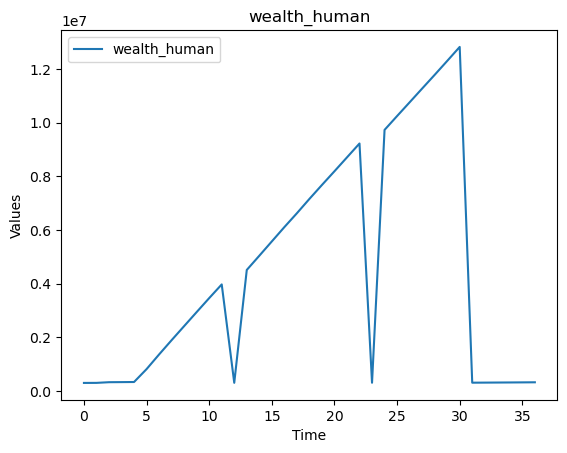

expenditure_consumption


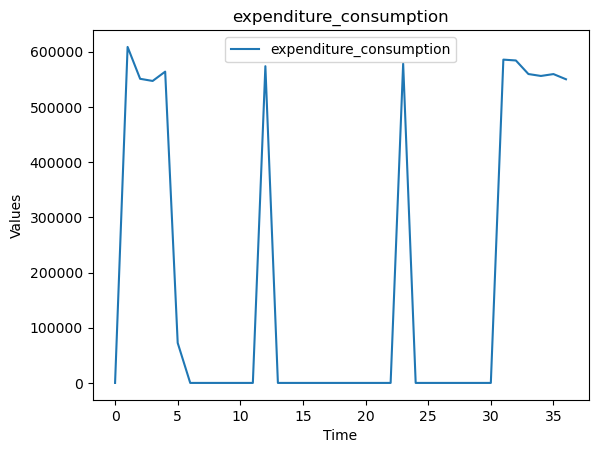

expenditure_tax


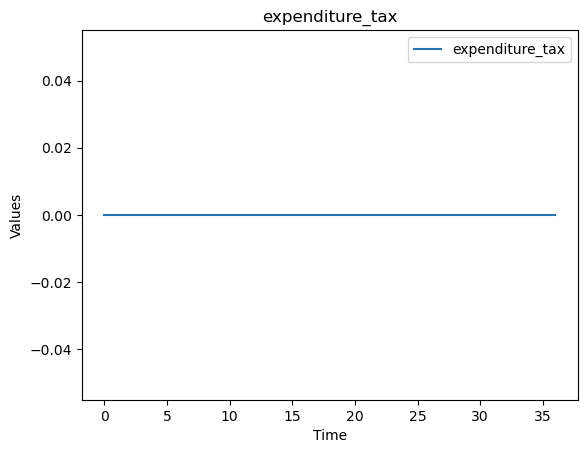

consumption_propensity


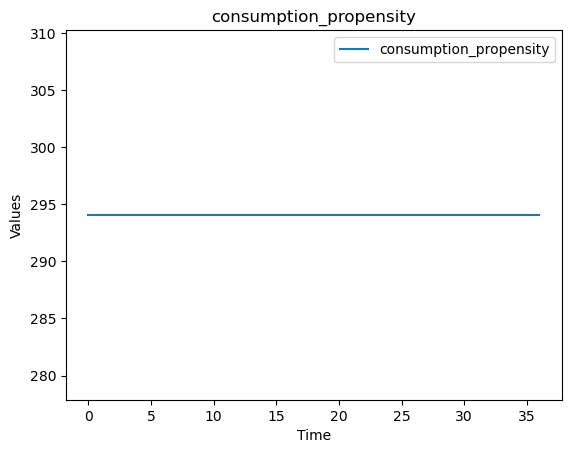

new_savings


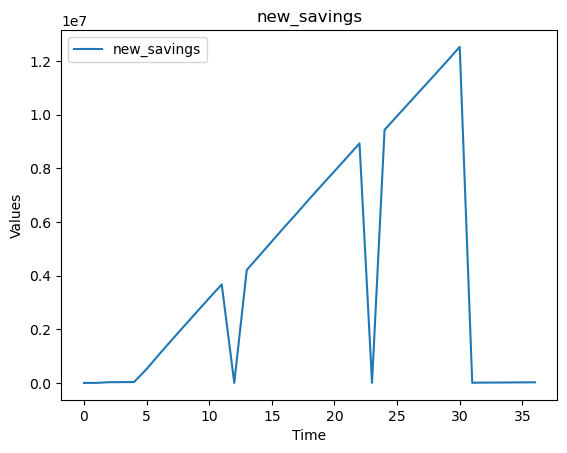

cash_on_hand_real_desired


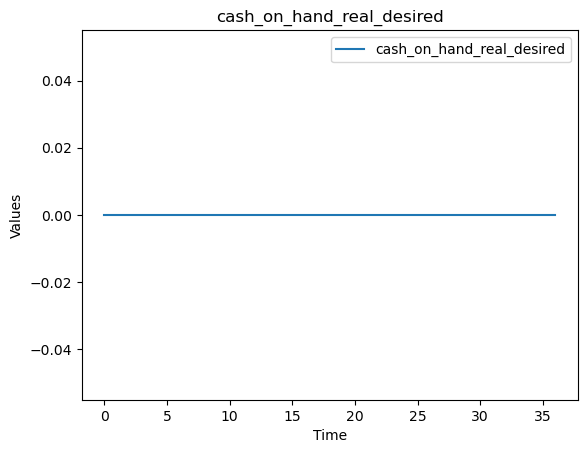

cash_on_hand_desired


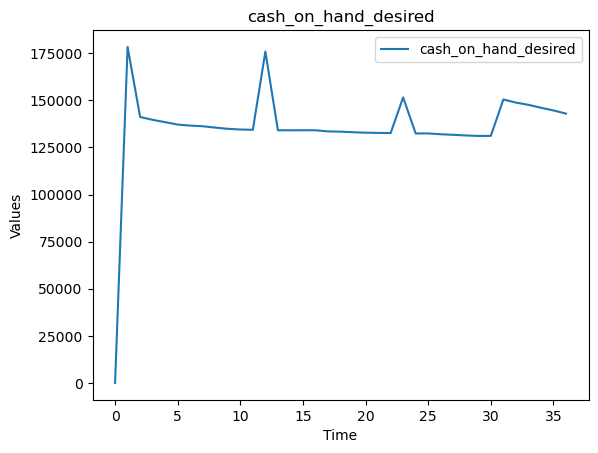

cash_on_hand_current


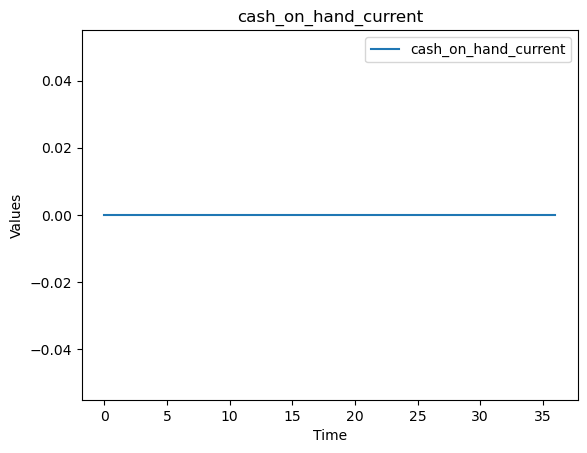

saving_propensity


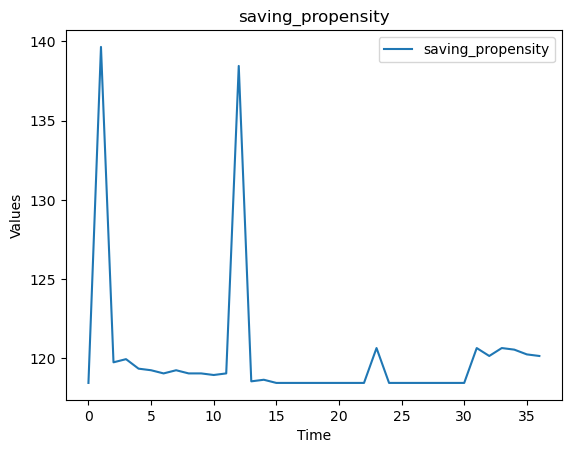

saving_propensity_optimist


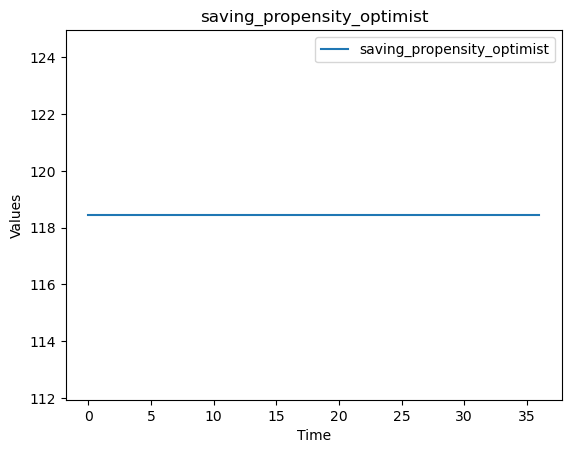

saving_propensity_pessimist


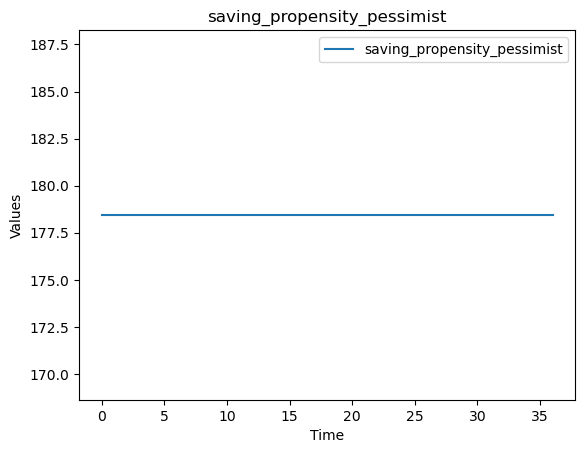

income_current


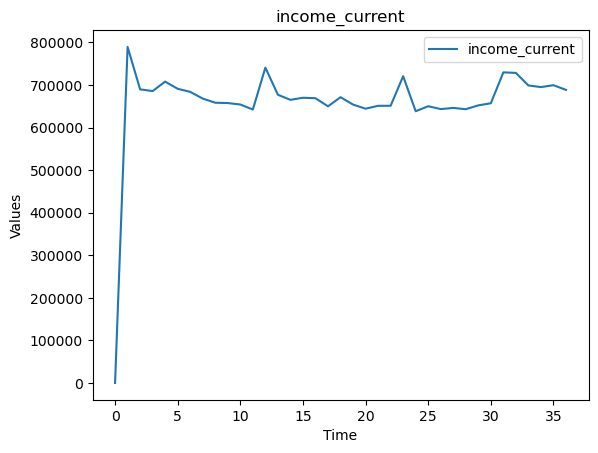

income_average


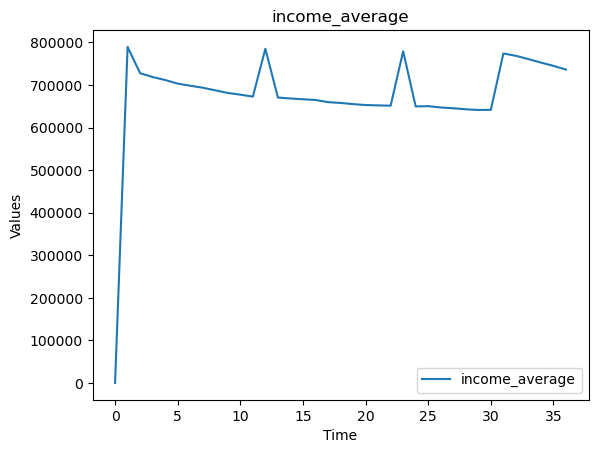

income_wage


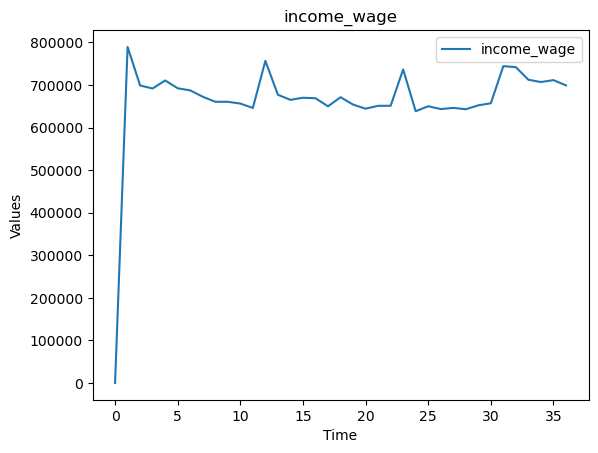

income_unemployment_benefit


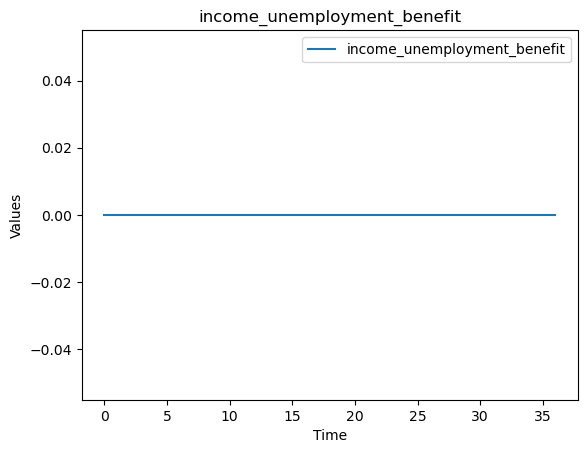

income_gov_transfers


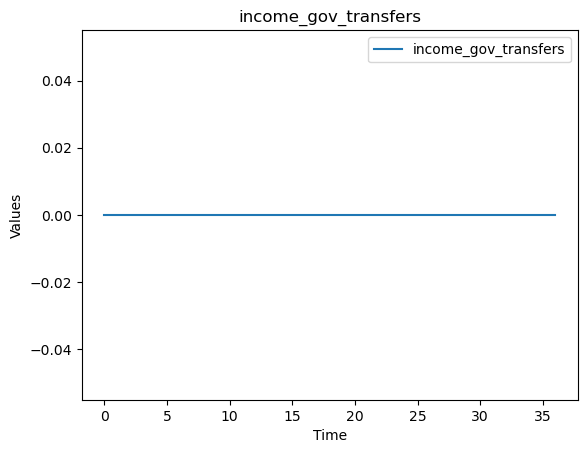

income_firm_owner_dividend


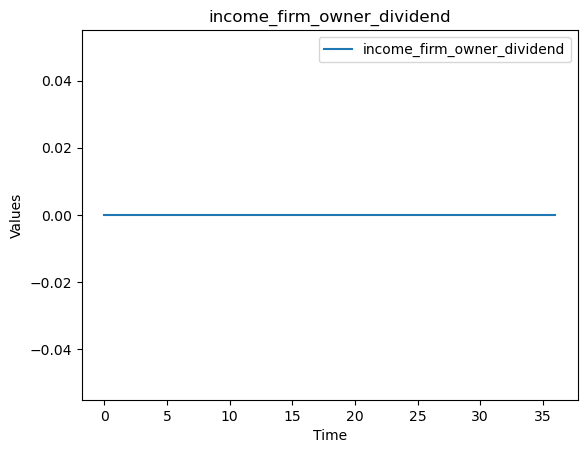

unemployed


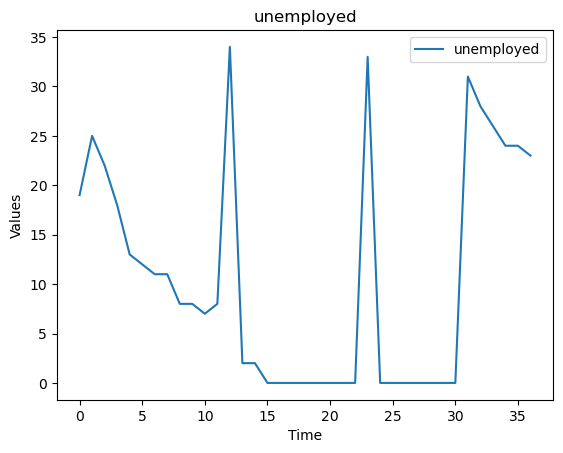

reservation_wage


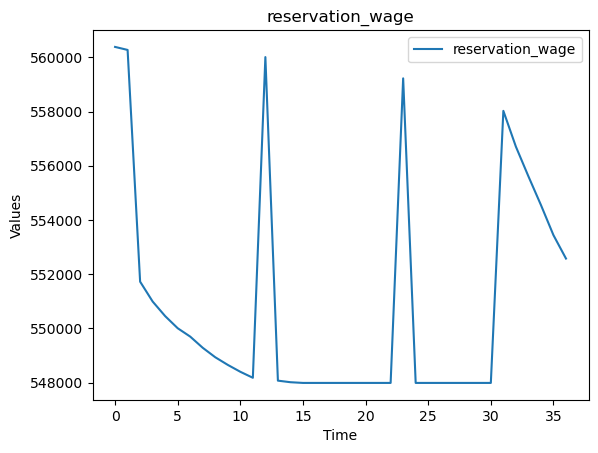

unemp_duration


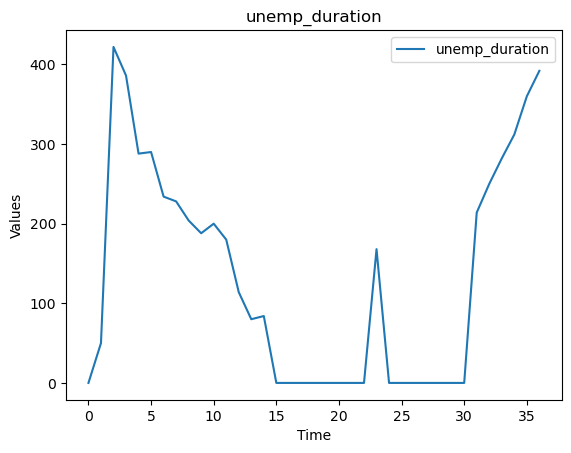

unemp_duration_upper_bound


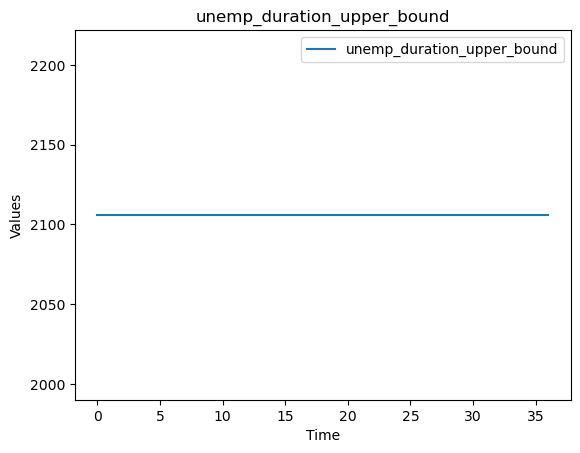

positive_sentiment


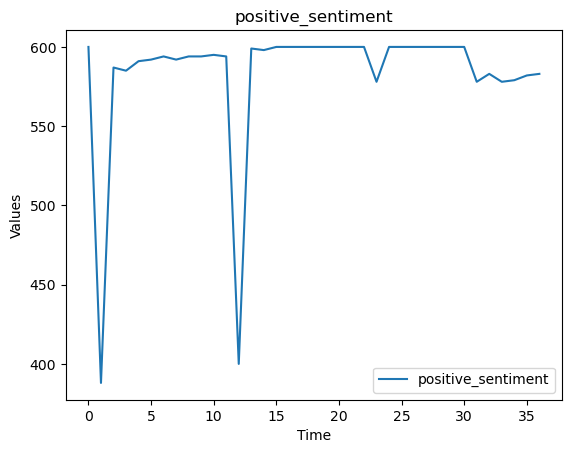

business_owner


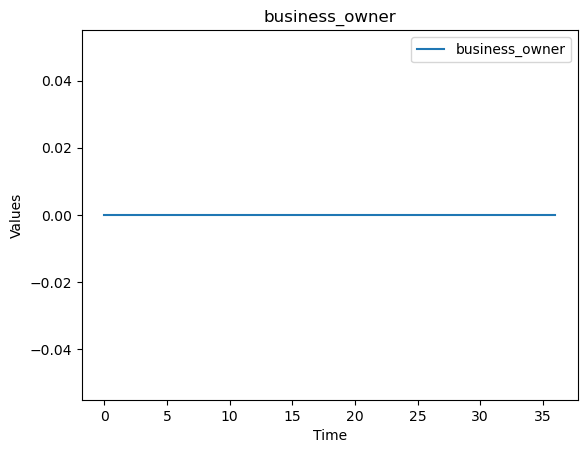

c_f


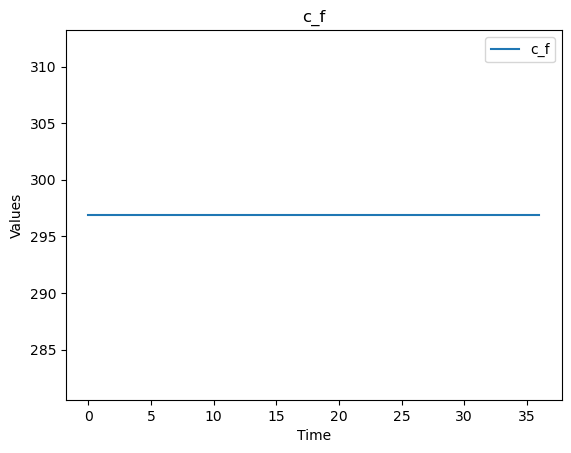

c_h


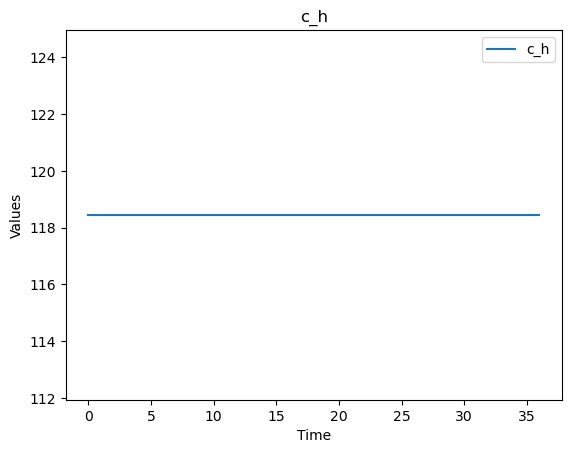

c_excess_money


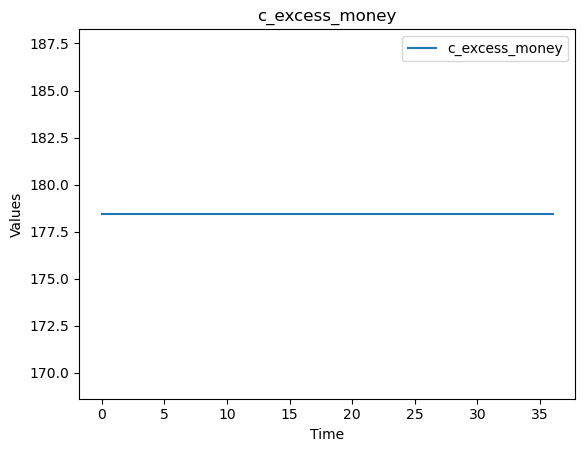

p_majority_op_adoption


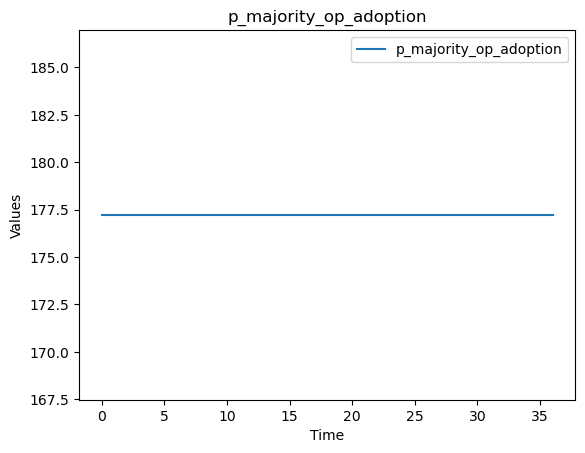

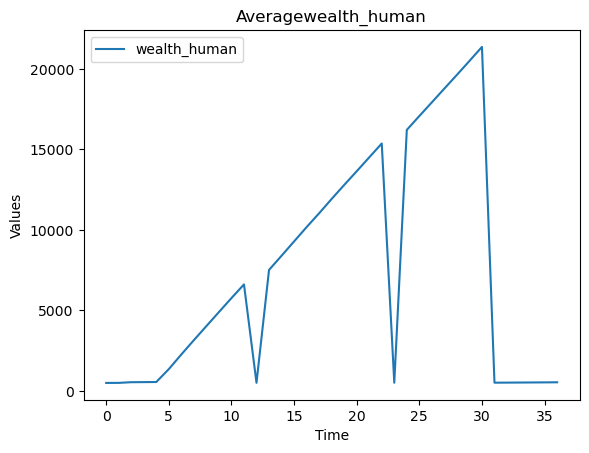

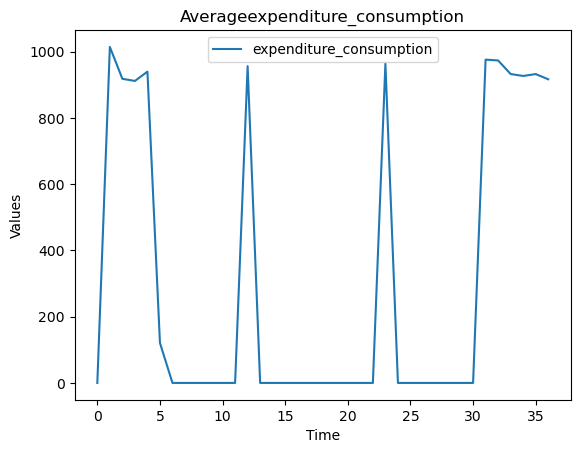

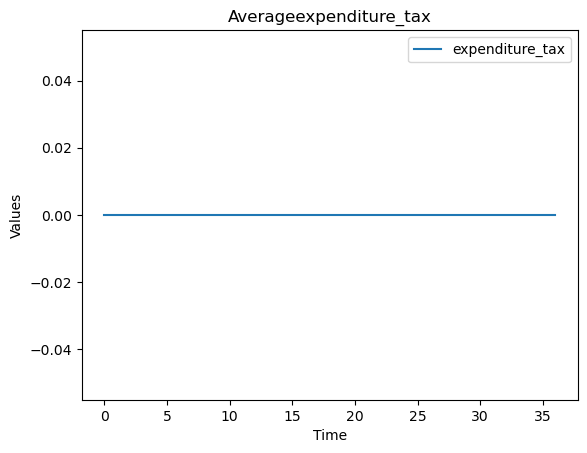

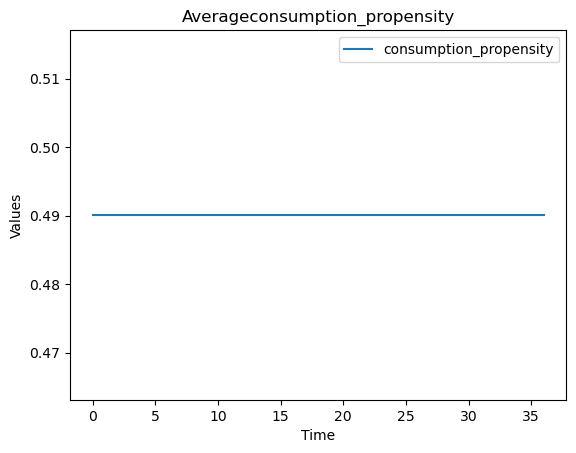

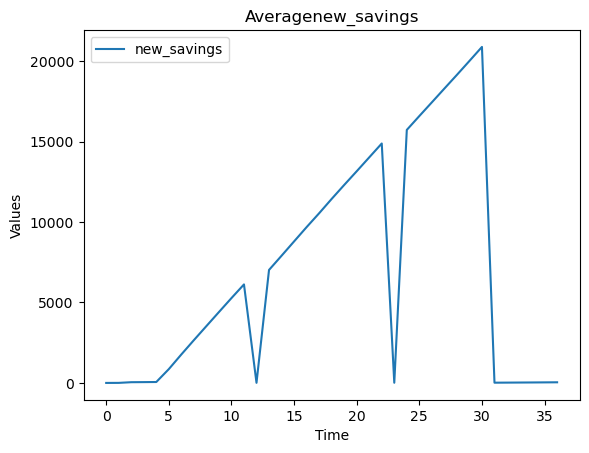

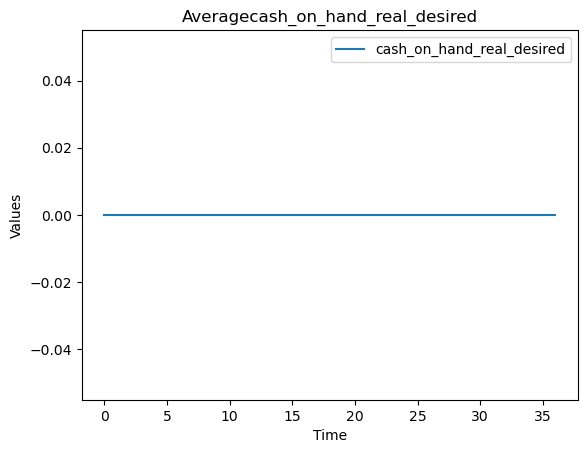

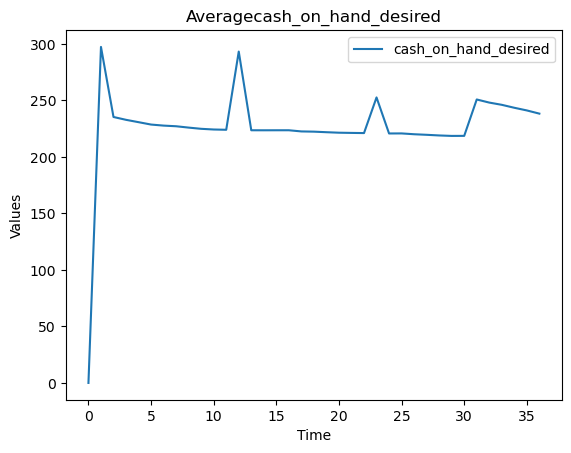

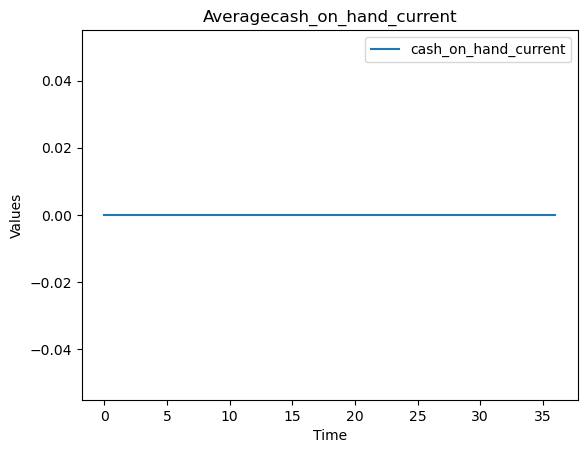

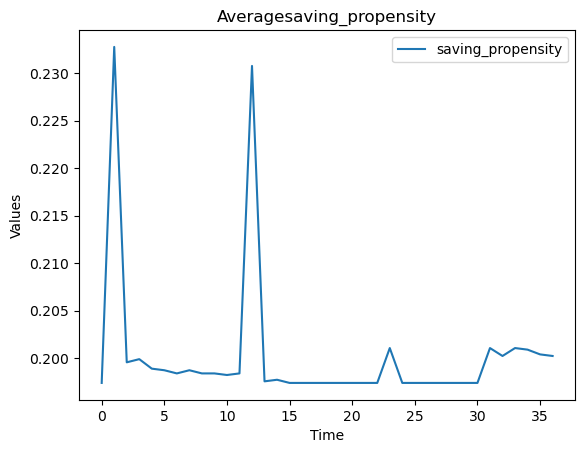

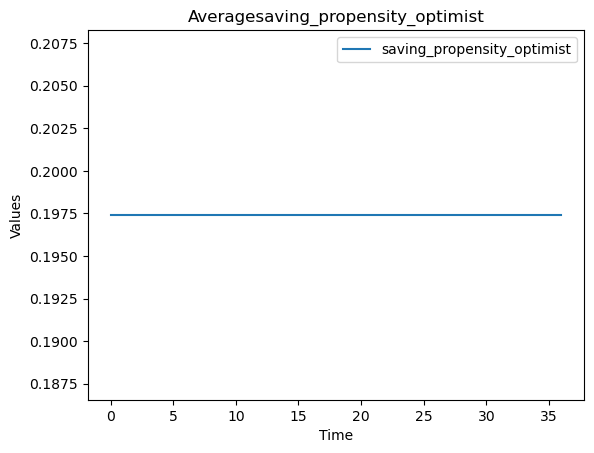

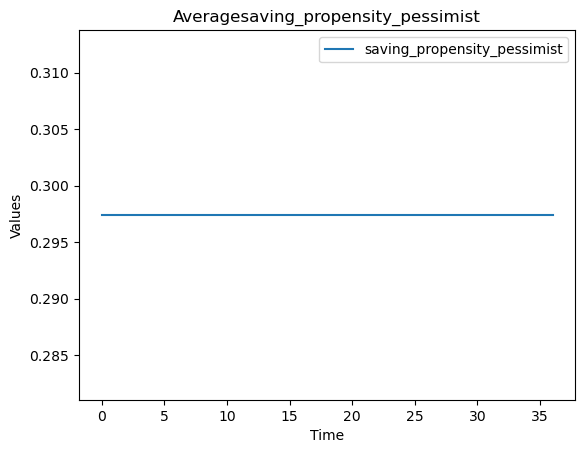

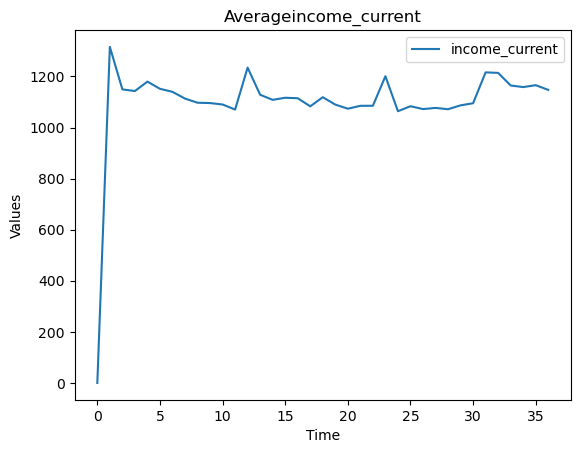

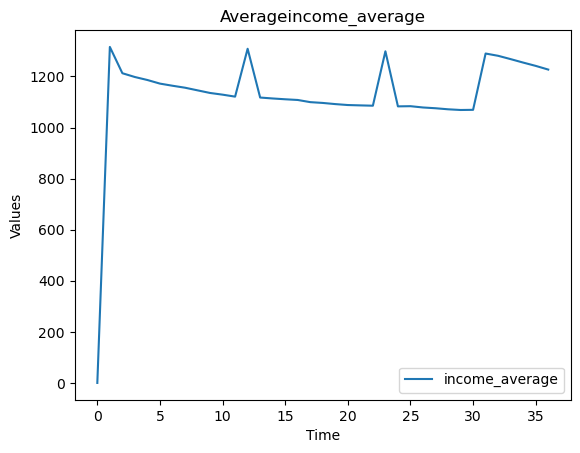

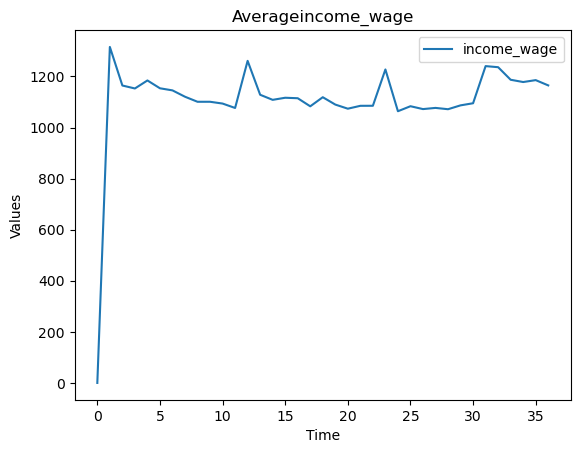

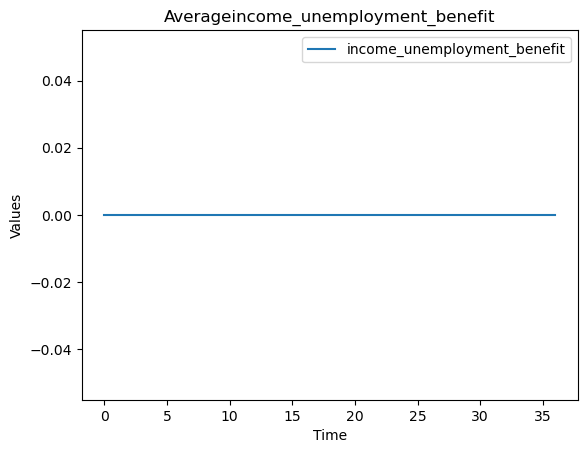

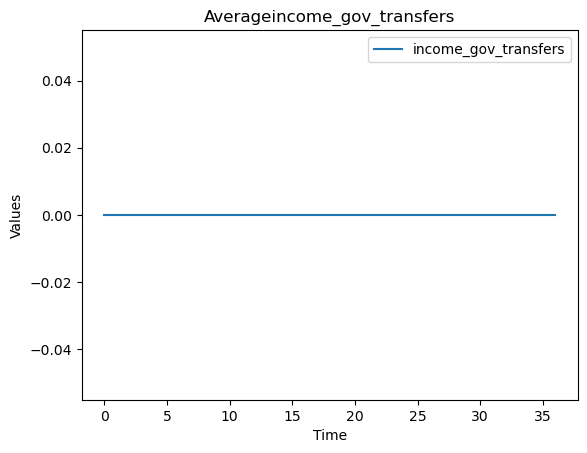

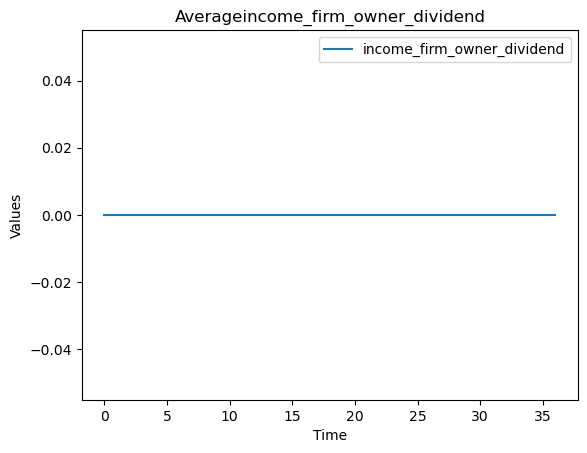

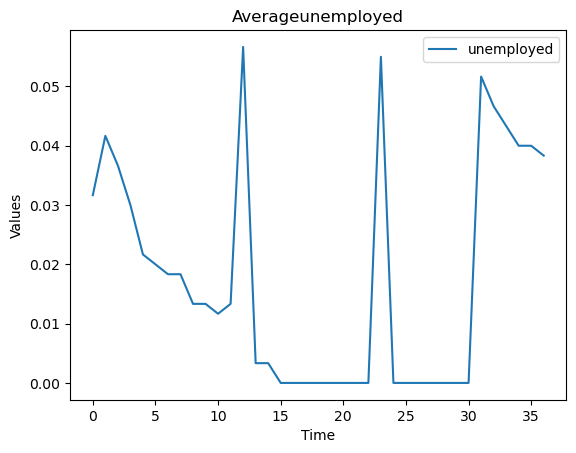

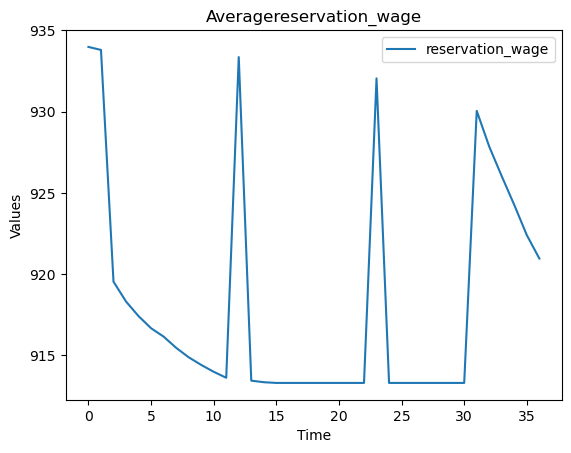

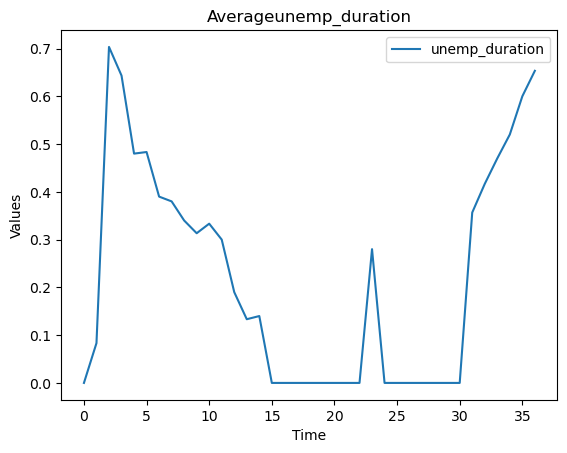

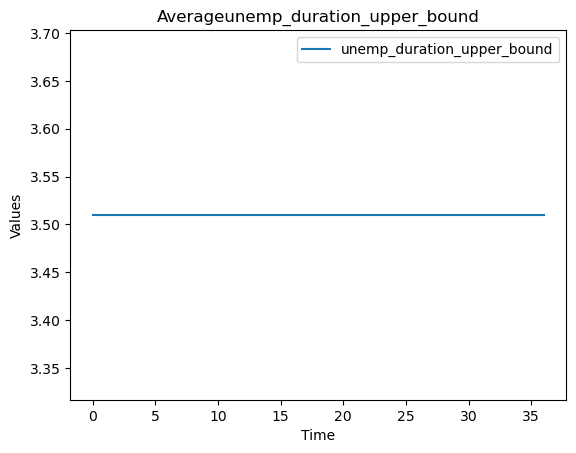

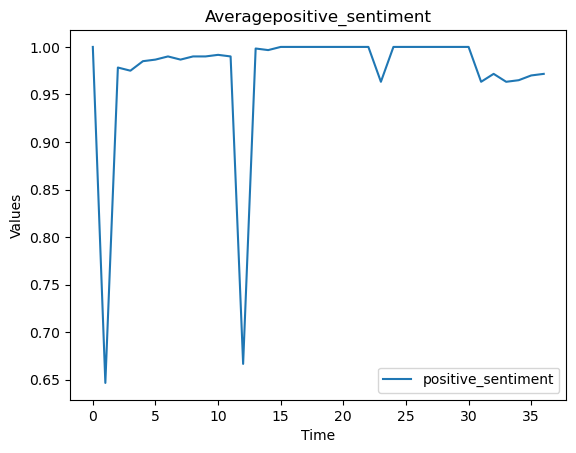

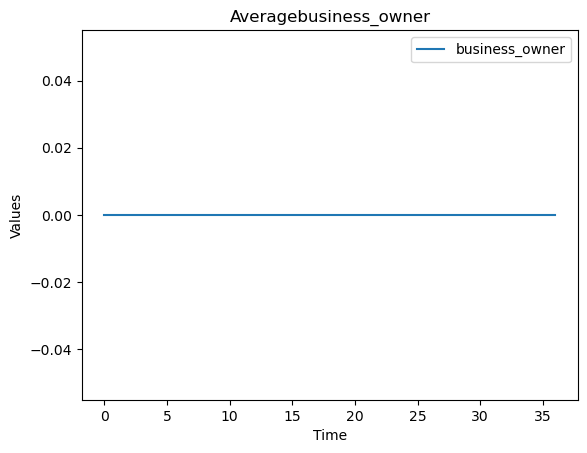

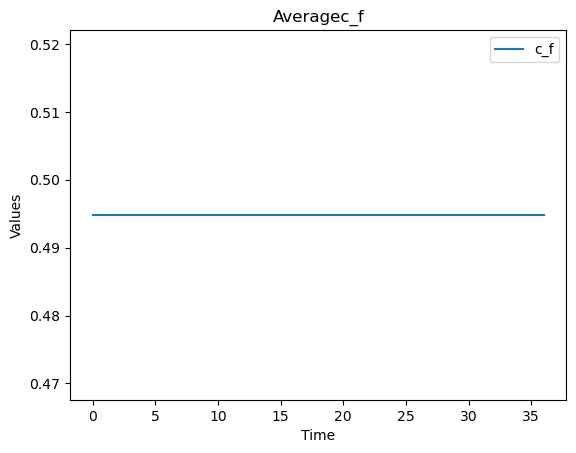

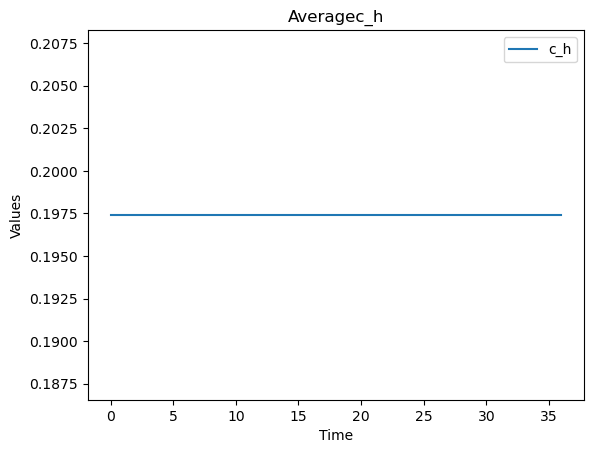

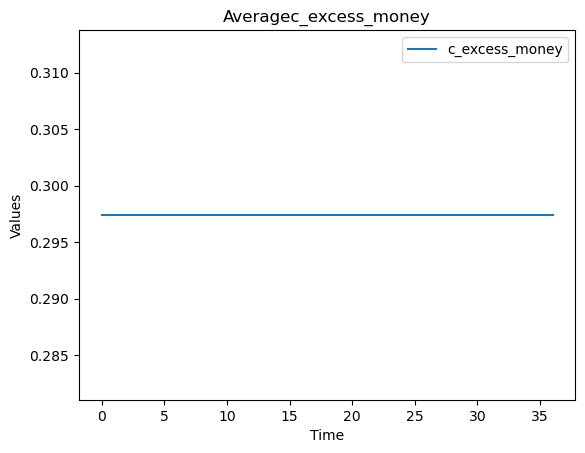

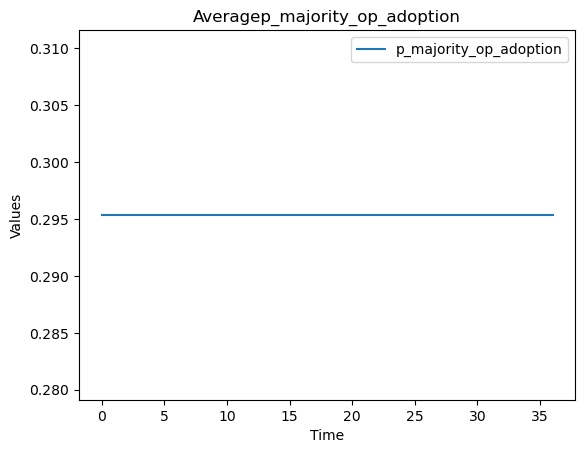

In [43]:
for column in cols:
    print(column)
    plt.plot(t, households[column], label=column)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(column)
    plt.legend()
    plt.show()
    
#averages
for column in average_cols:
    plt.plot(t, households_average[column], label=column)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(f"Average{column}")
    plt.legend()
    plt.show()

#### Plot some cons and cap firm stuff

In [46]:
cols = cons_firms.columns
average_cols = cons_firms.columns
cols

Index(['production_current', 'production_planned', 'production_past',
       'quantity_sold', 'total_income', 'revenue_sales', 'new_loan_issuance',
       'subsidies', 'good_price_current', 'good_price_past',
       'total_liabilities', 'labor_wage_bill', 'capital_costs', 'tax_payments',
       'debt_principal_payments', 'debt_interest_payments',
       'dividend_payments', 'total_assets', 'leverage_ratio', 'cash_on_hand',
       'dividend_ratio', 'dividend_ratio_optimist', 'dividend_ratio_pessimist',
       'employee_count', 'wage_offer', 'employee_count_desired',
       'n_active_job_postings', 'need_worker', 'w_target', 'w_current',
       'inventory', 'working_capital_inventory', 'desired_inventory_factor',
       'inventory_factor', 'sentiment', 'bankrupt', 'is_cons_firm',
       'average_profit', 'average_sale_quantity', 'short_term_funding_gap',
       'long_term_funding_gap', 'expected_wage_bill', 'layoff_wage_savings',
       'expected_wage_bill_shortfall', 'expected_long_term

In [45]:
cols = ['production_current', 'production_planned', 'production_past',
       'quantity_sold', 'total_income', 'revenue_sales', 'new_loan_issuance',
       'subsidies',
       'total_liabilities', 'labor_wage_bill', 'capital_costs', 'tax_payments',
       'debt_principal_payments', 'debt_interest_payments',
       'dividend_payments', 'total_assets', 'leverage_ratio', 'cash_on_hand',
       'dividend_ratio', 'dividend_ratio_optimist', 'dividend_ratio_pessimist',
       'employee_count', 'wage_offer', 'employee_count_desired',
       'n_active_job_postings', 'need_worker', 'w_target', 'w_current',
       'inventory', 'working_capital_inventory', 'desired_inventory_factor',
       'inventory_factor', 'sentiment', 'bankrupt', 'is_cons_firm',
       'average_profit', 'average_sale_quantity', 'short_term_funding_gap',
       'long_term_funding_gap', 'expected_wage_bill', 'layoff_wage_savings',
       'expected_wage_bill_shortfall', 'expected_long_term_shortfall',
       'labor_utilization', 'desired_inventory', 'inventory_reaction_factor',
       'machine_utilization', 'desired_machines']

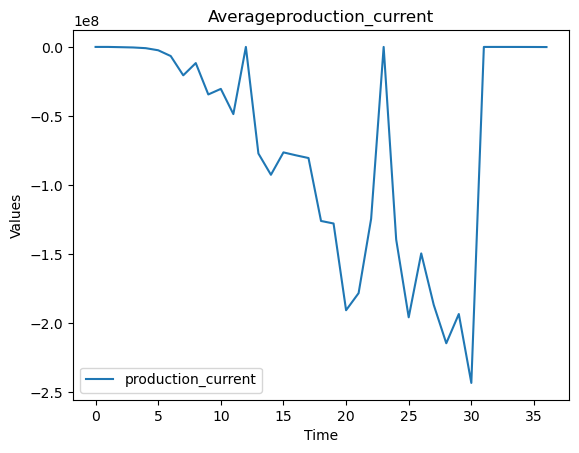

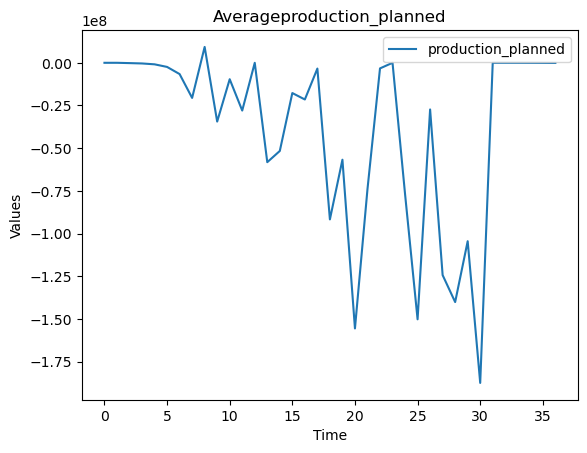

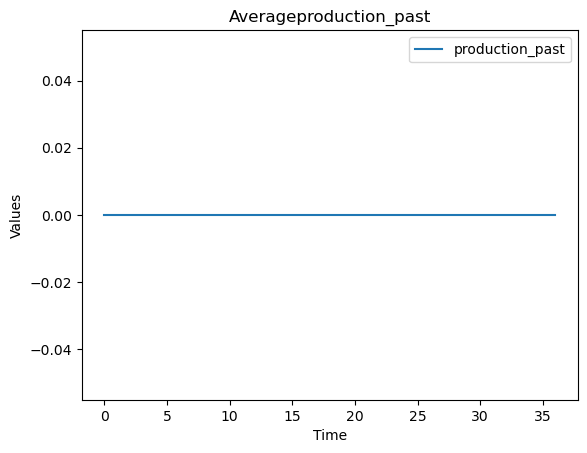

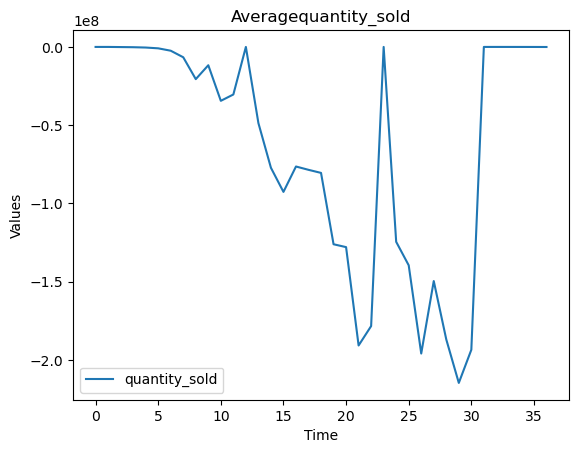

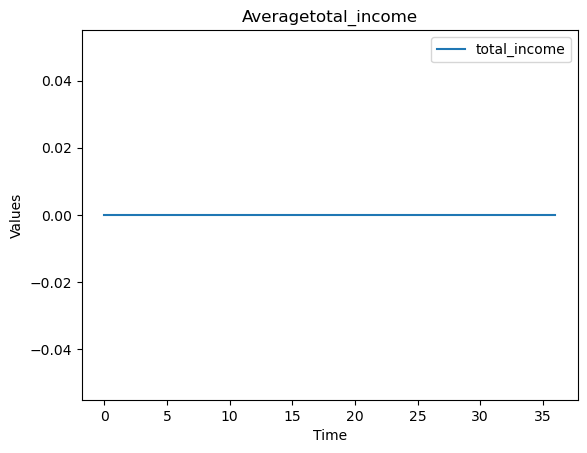

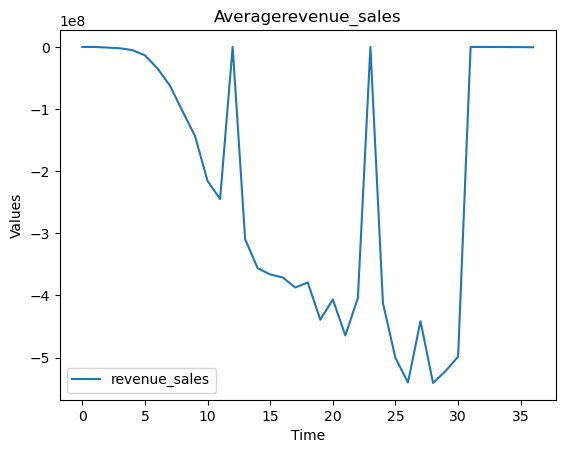

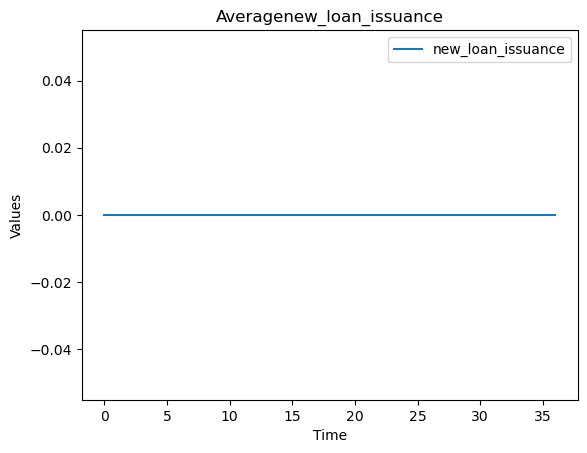

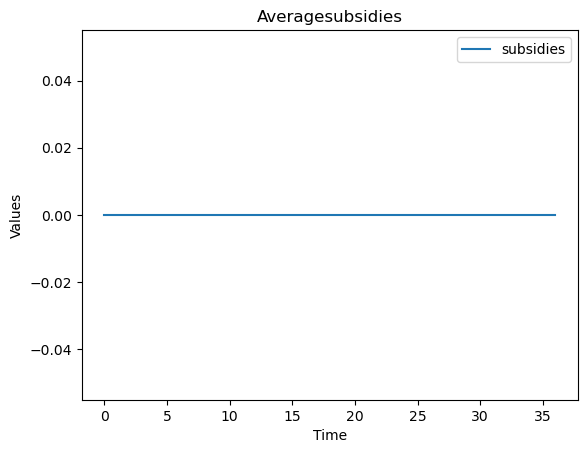

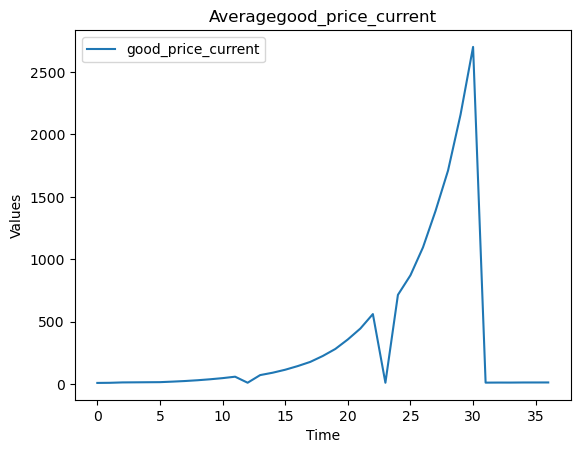

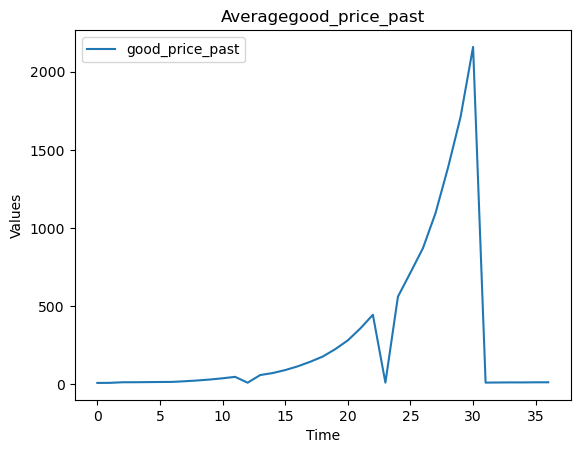

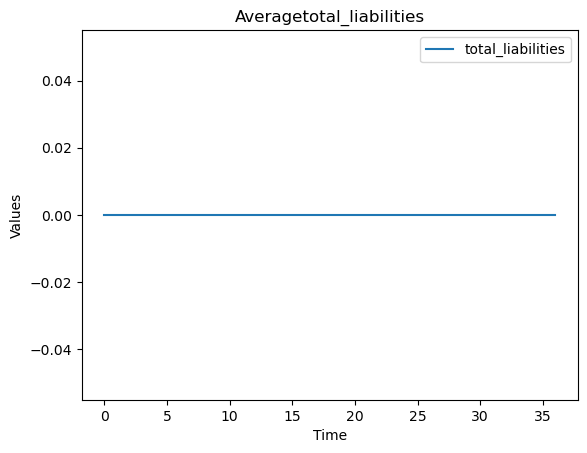

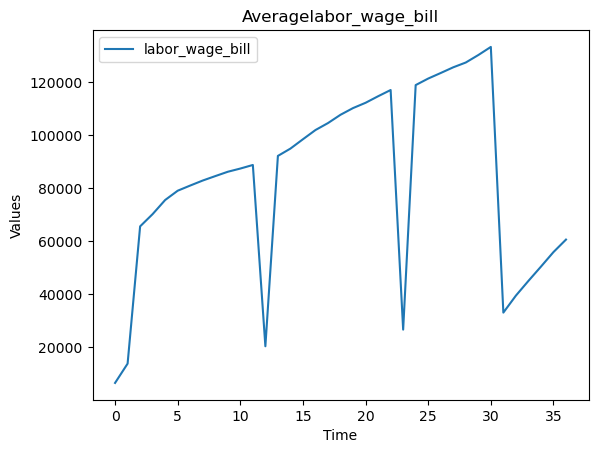

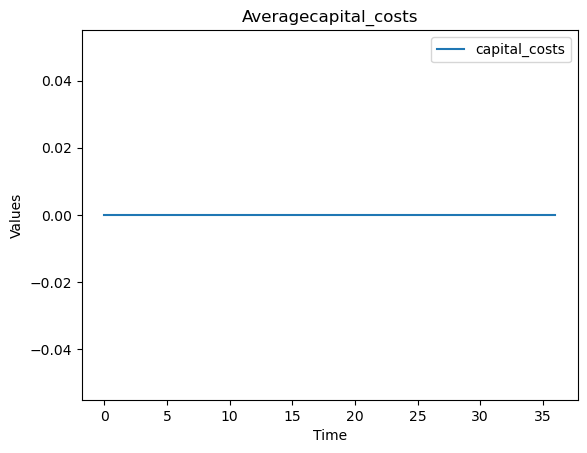

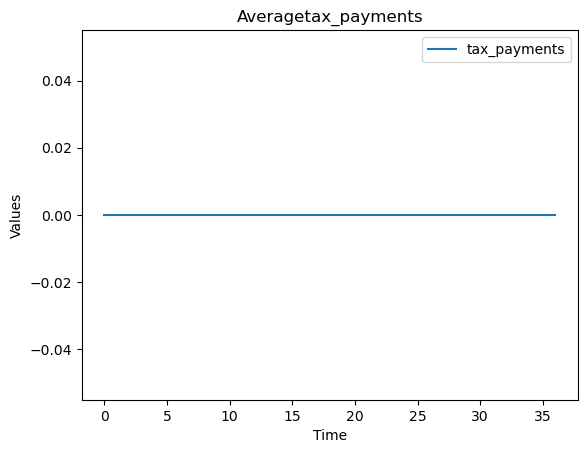

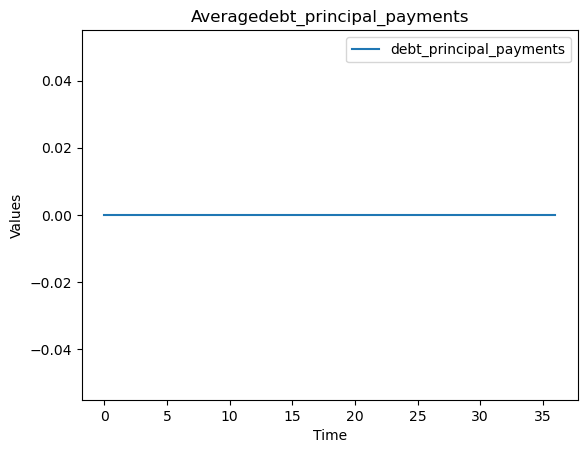

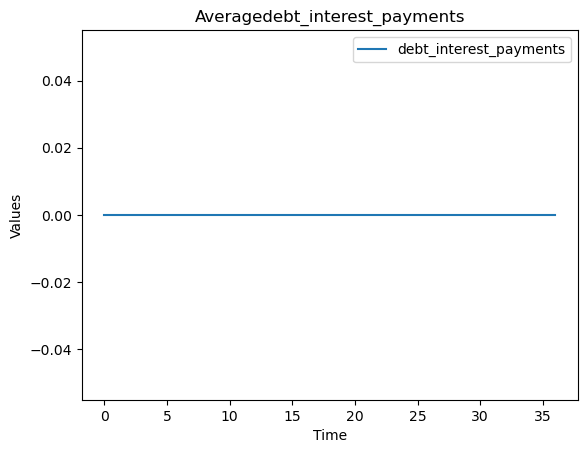

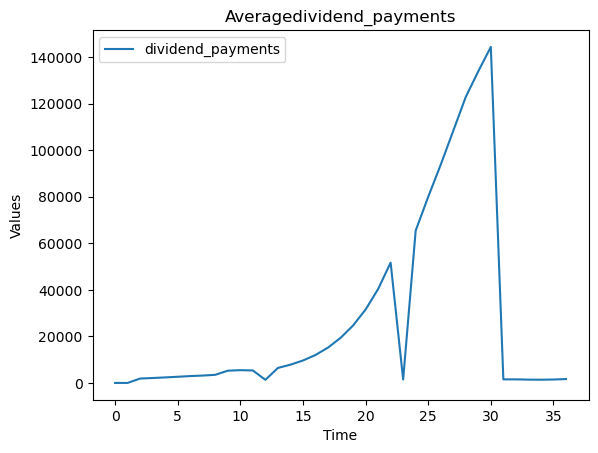

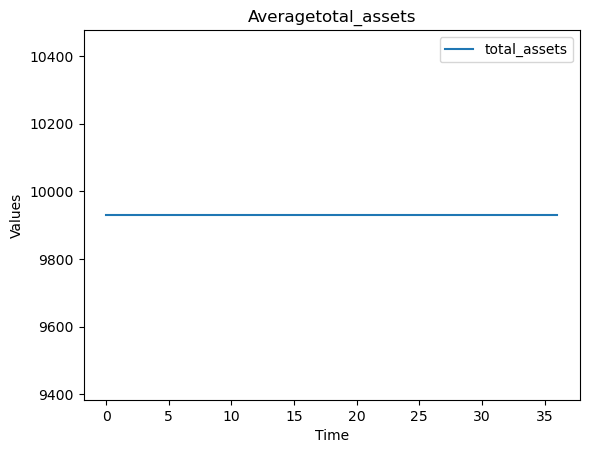

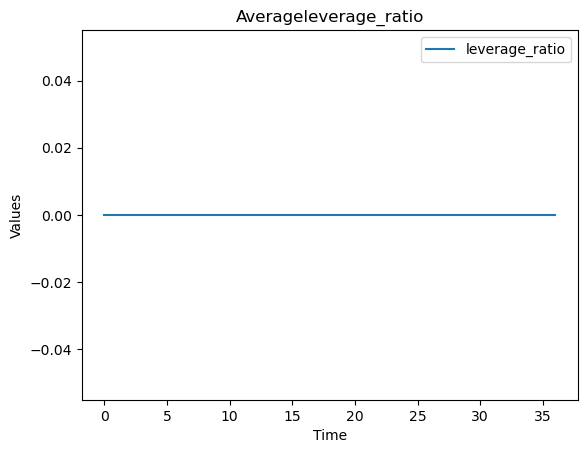

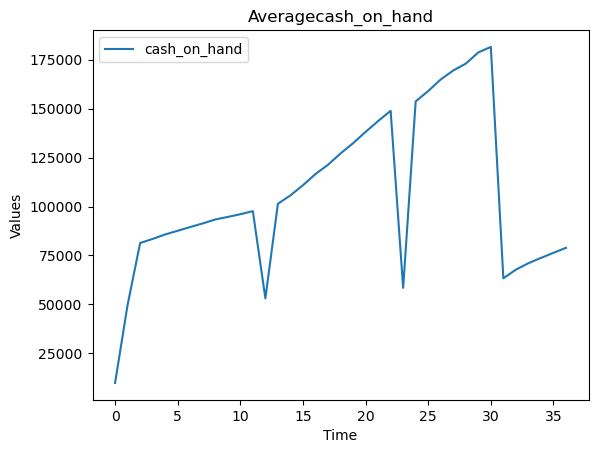

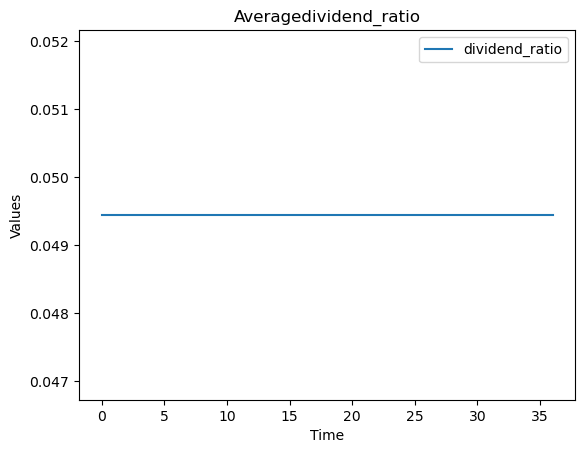

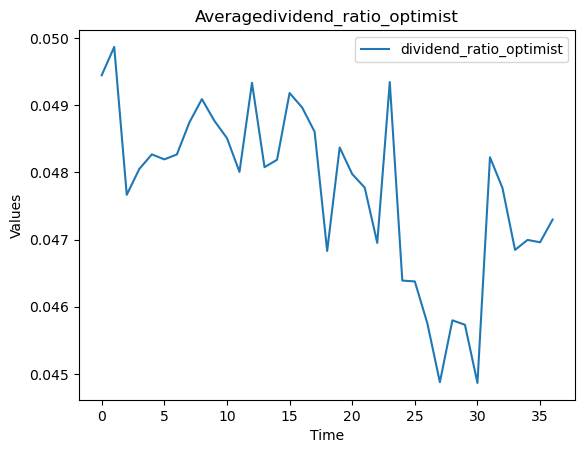

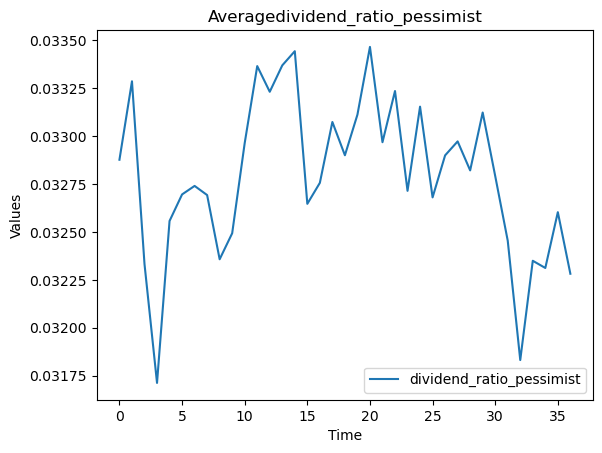

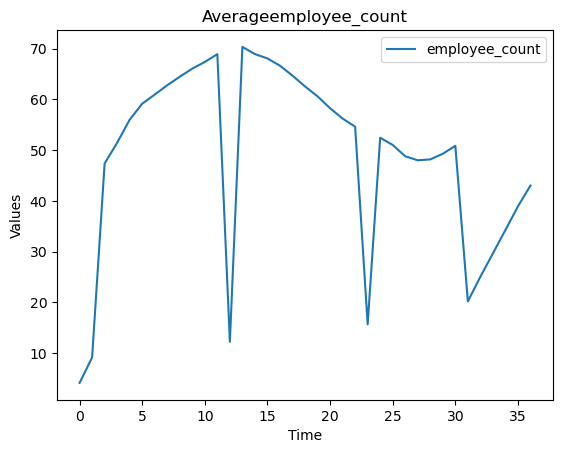

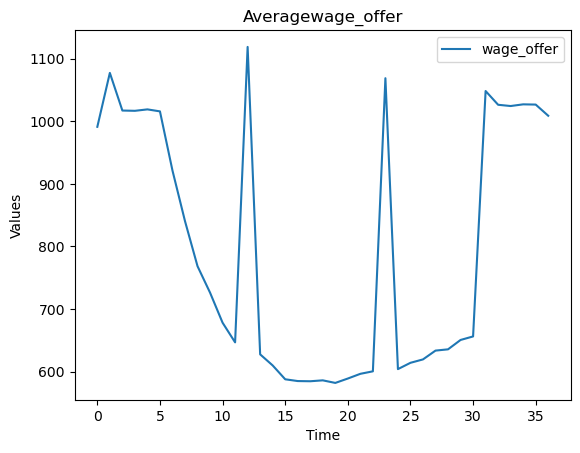

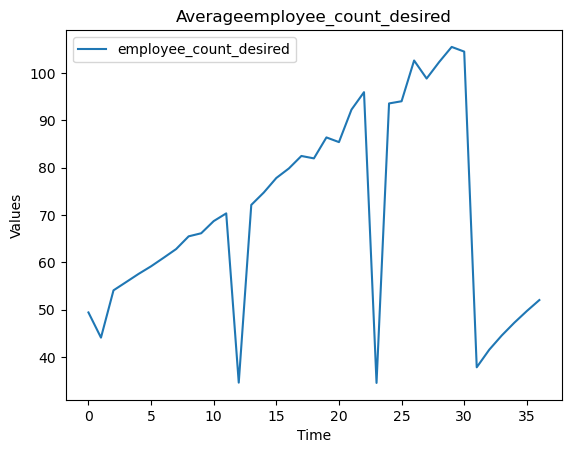

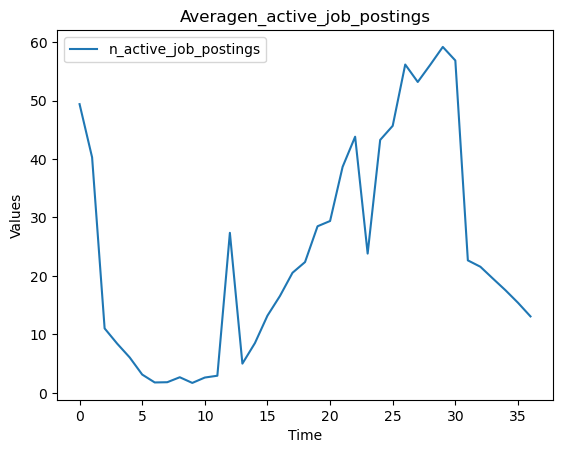

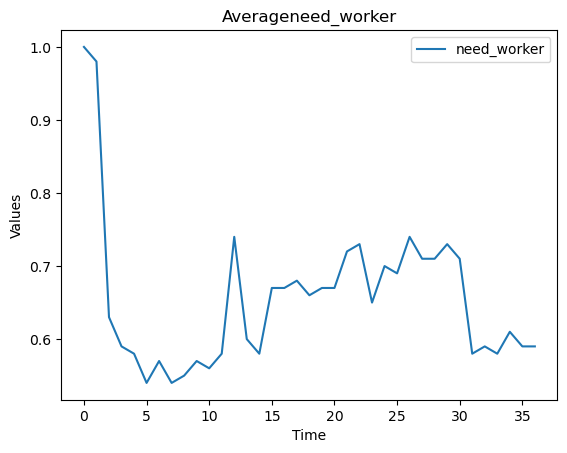

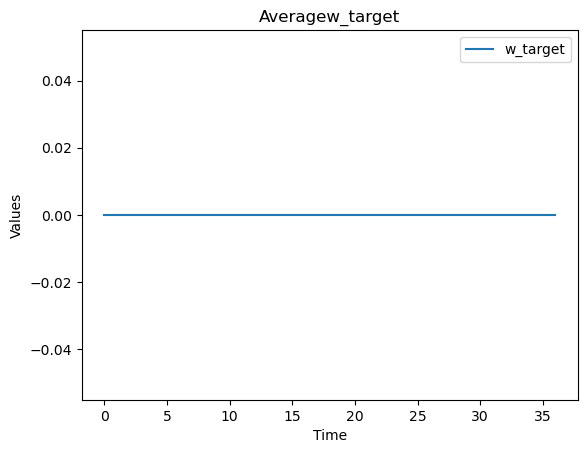

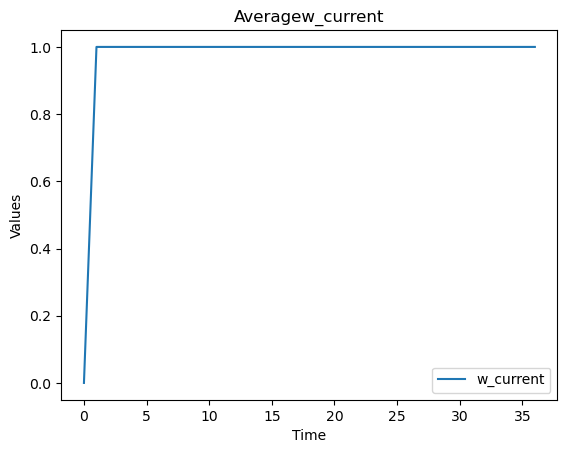

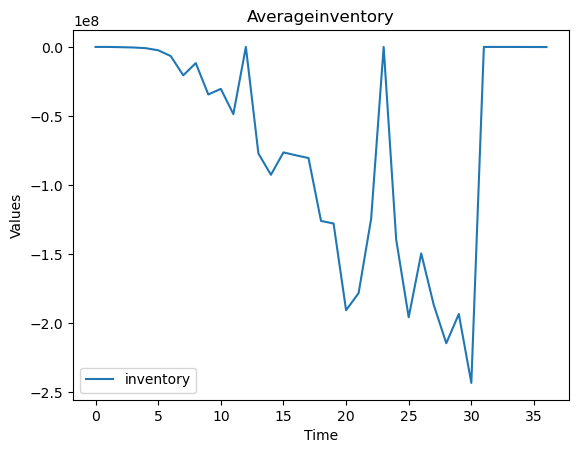

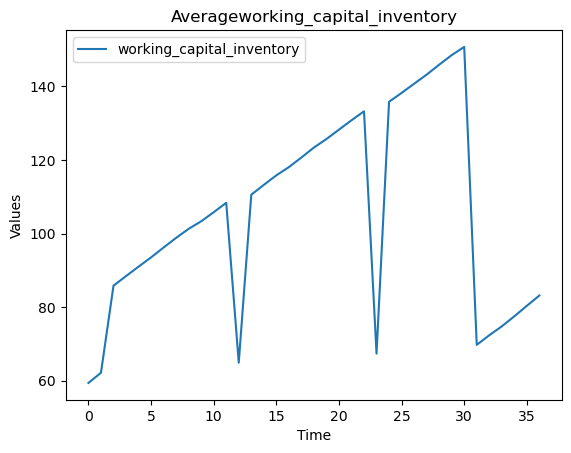

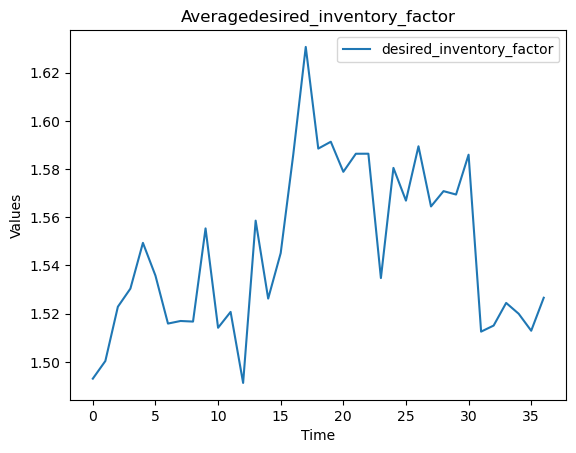

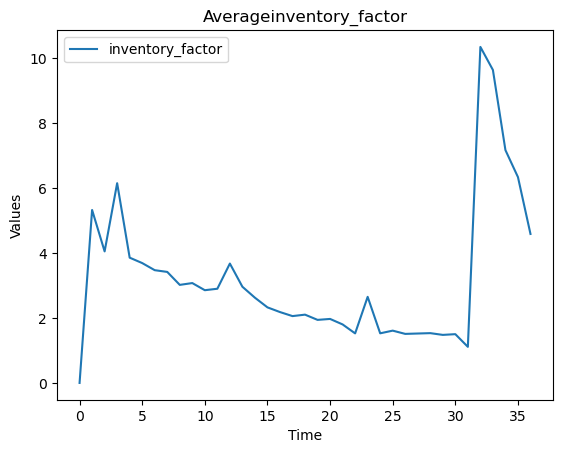

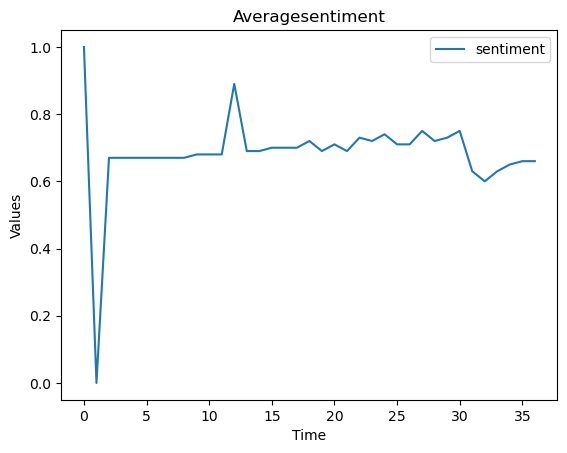

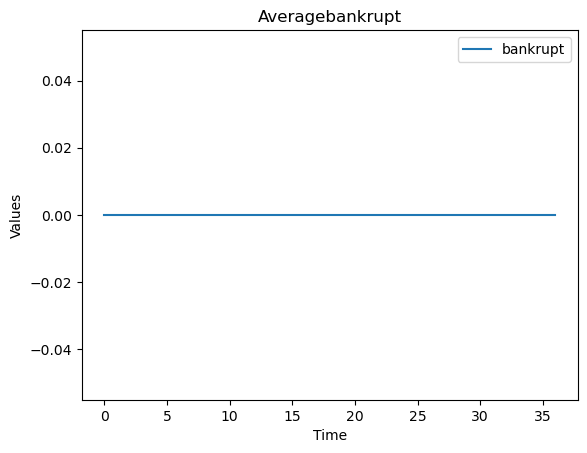

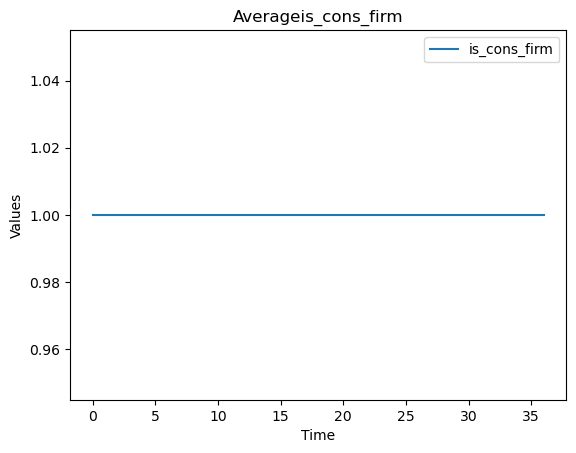

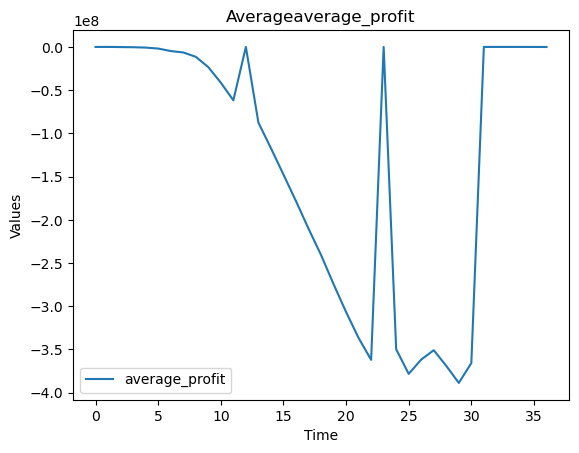

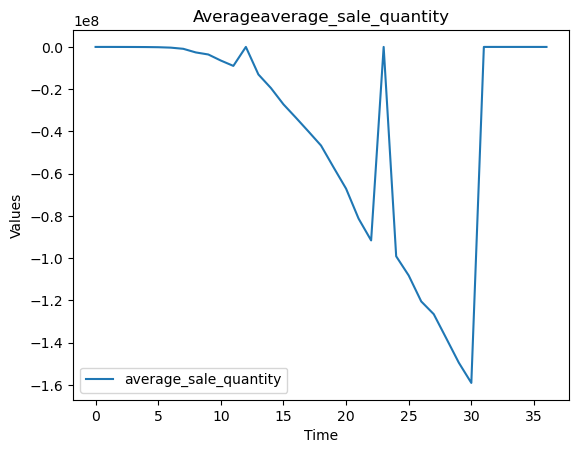

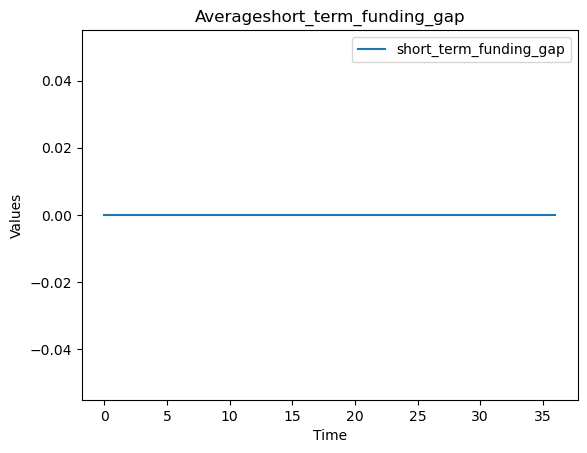

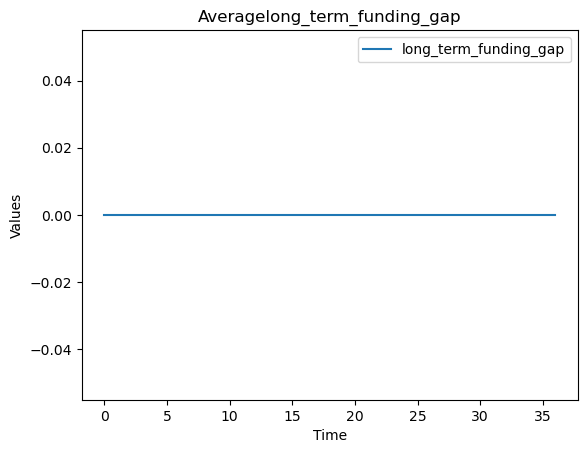

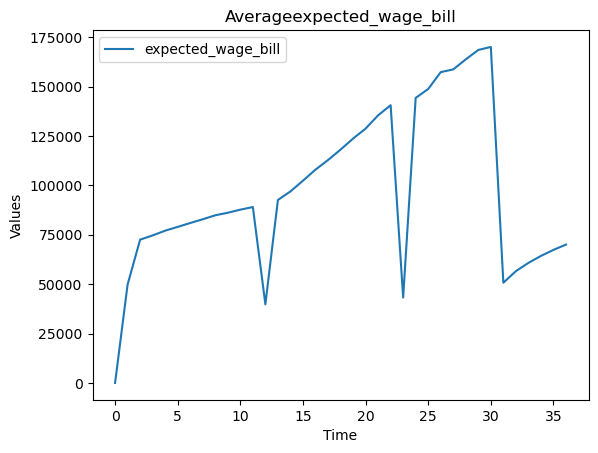

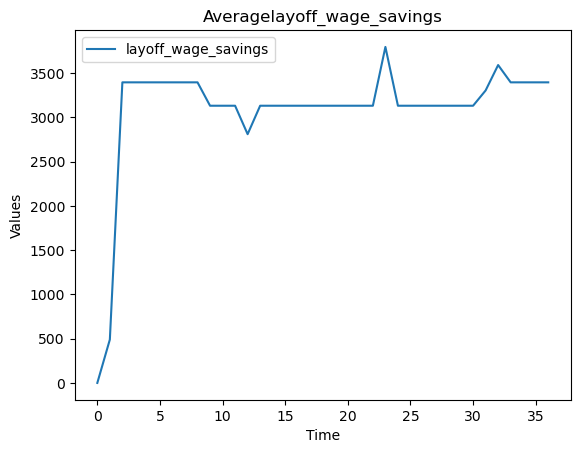

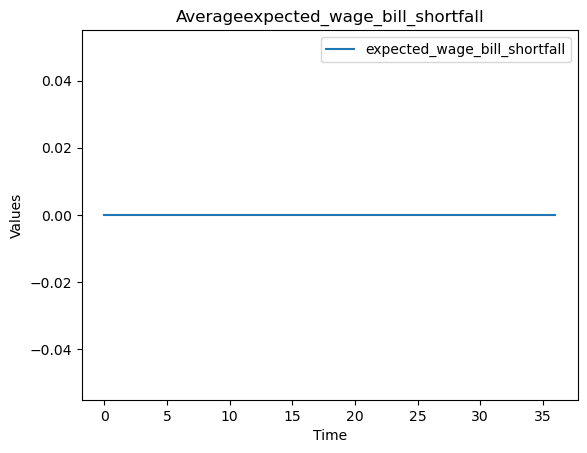

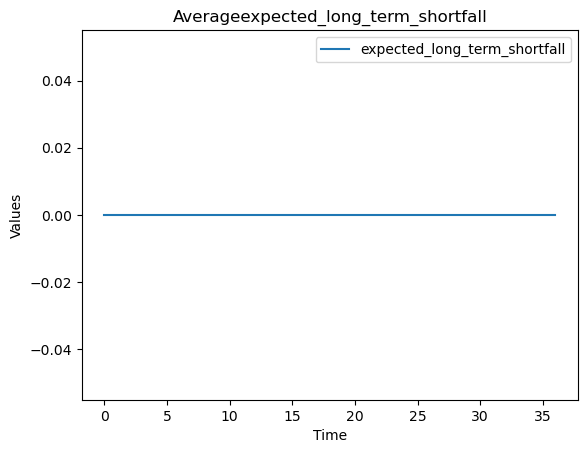

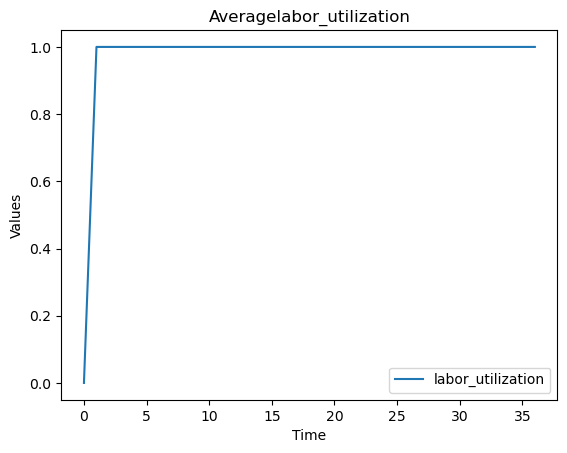

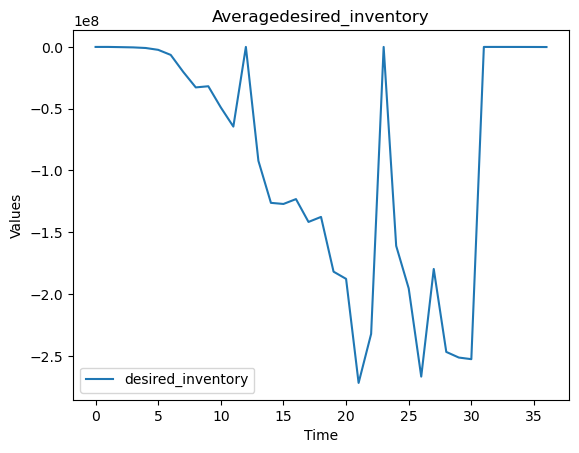

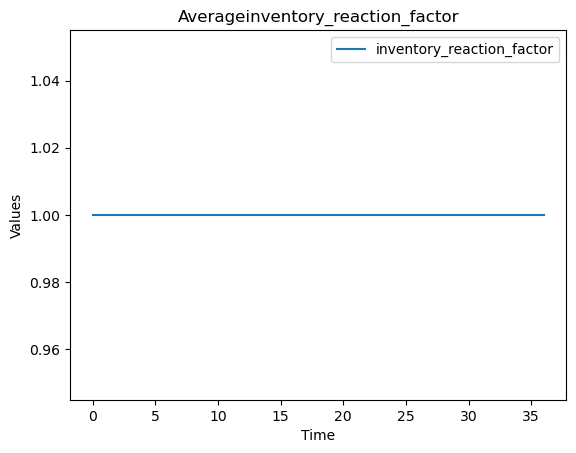

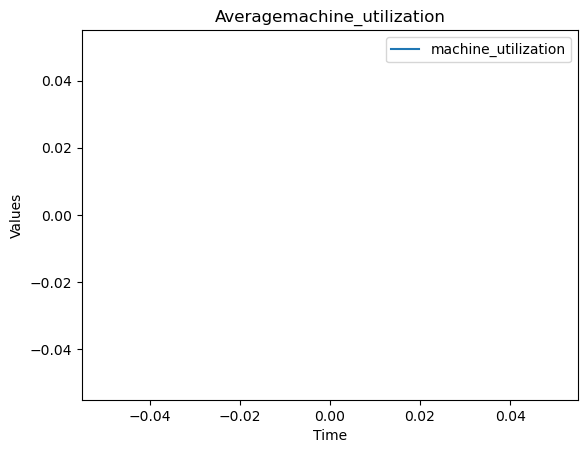

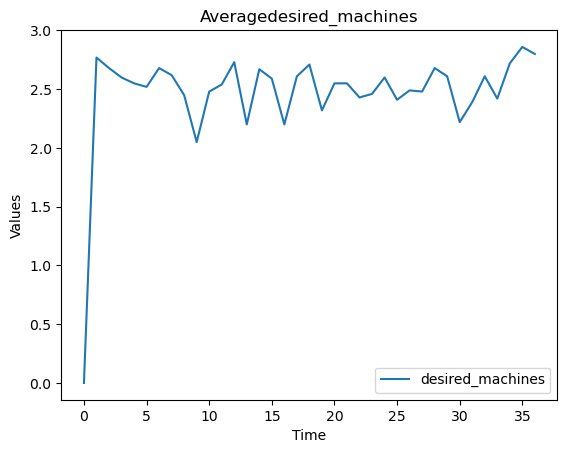

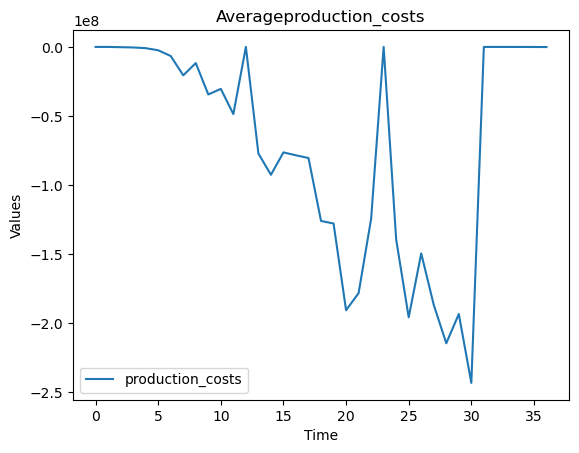

In [47]:
# averages for Consumer firm
for column in average_cols:
    plt.plot(t, cons_firms_average[column], label=column)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(f"Average{column}")
    plt.legend()
    plt.show()

### Averages for Capital firm

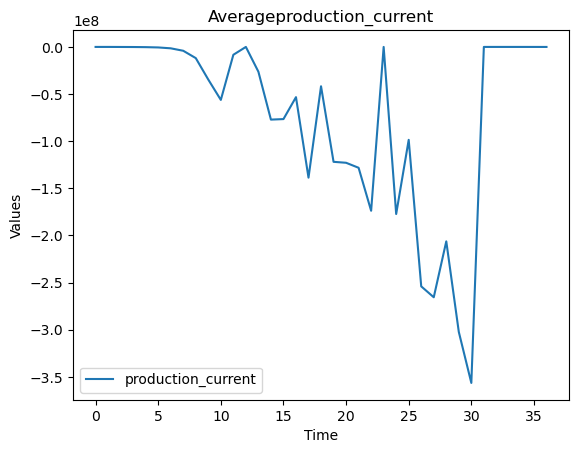

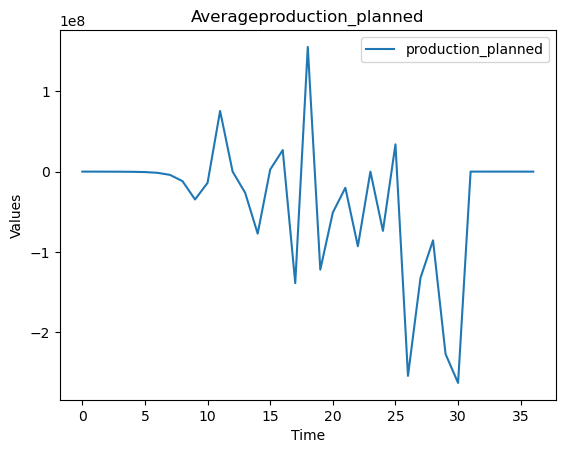

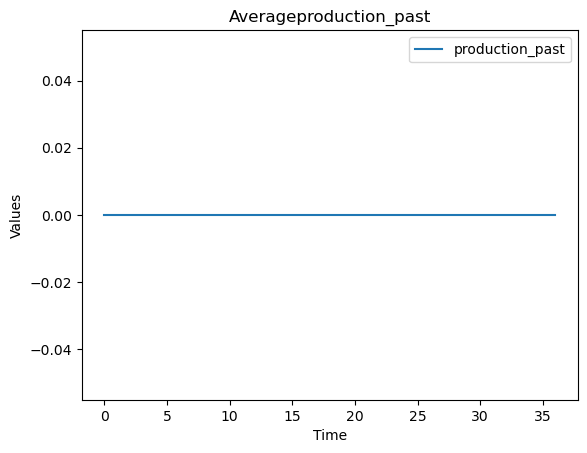

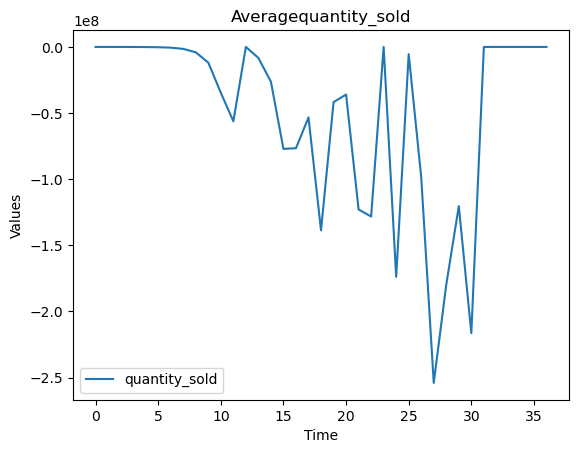

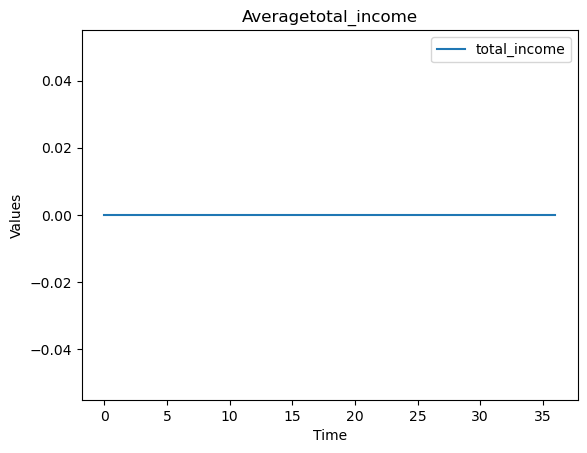

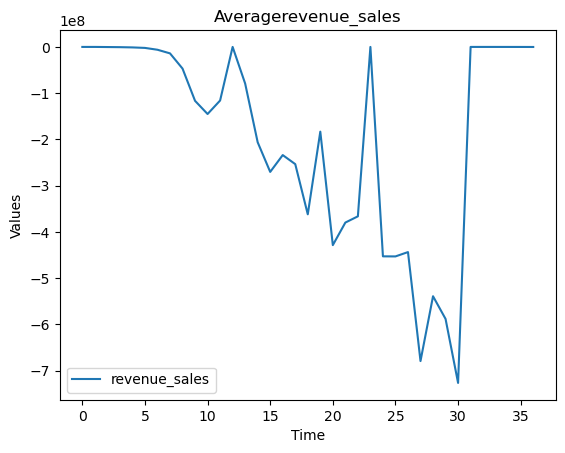

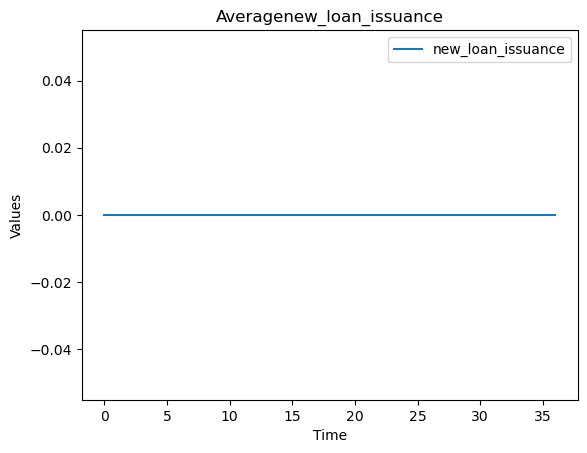

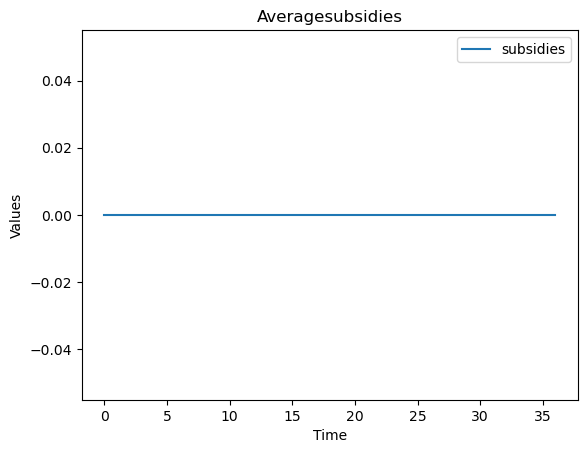

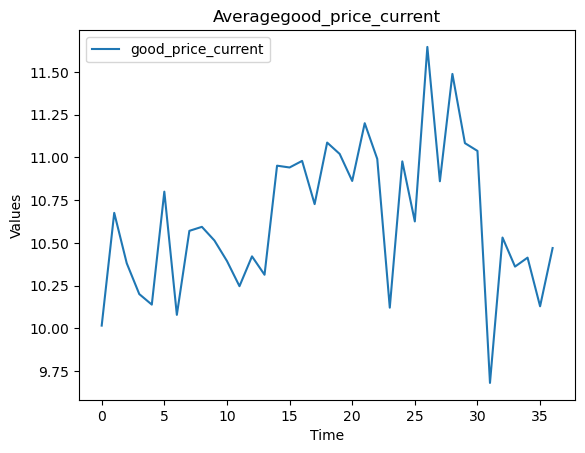

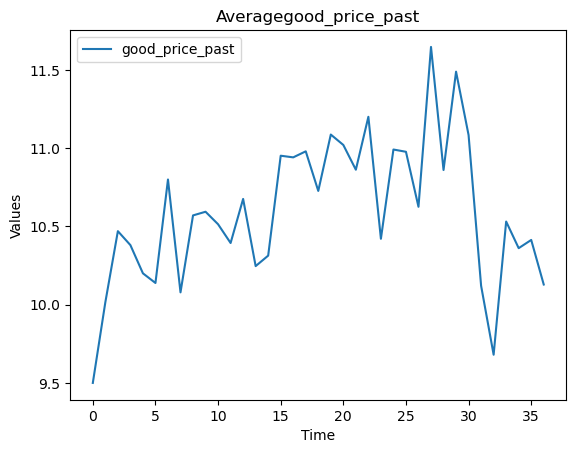

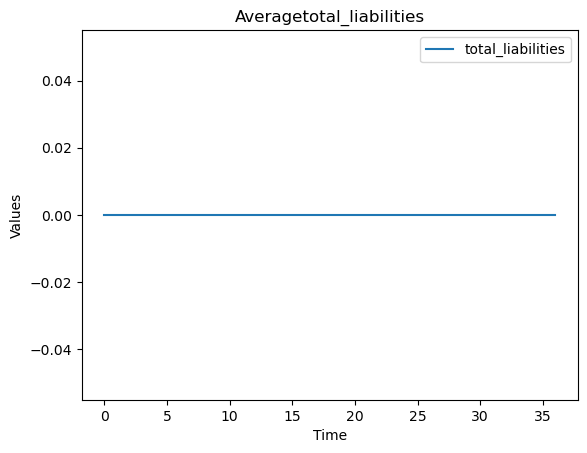

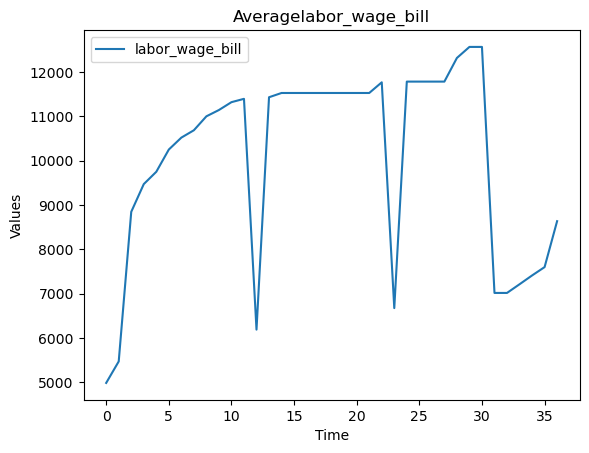

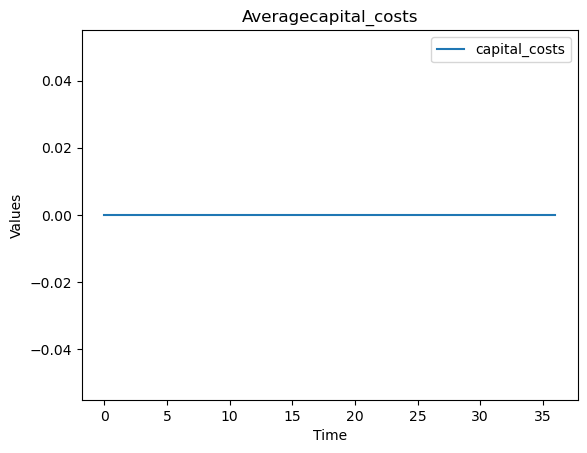

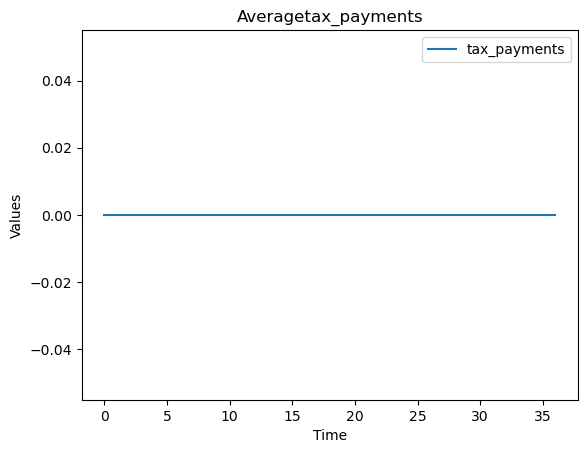

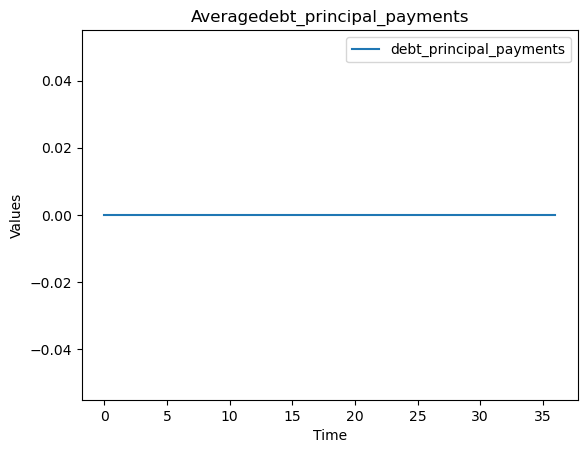

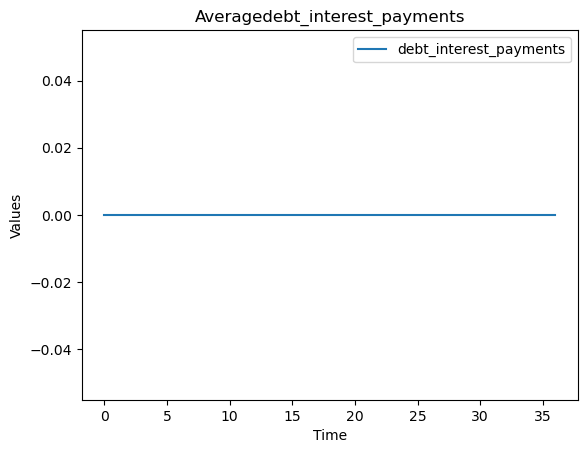

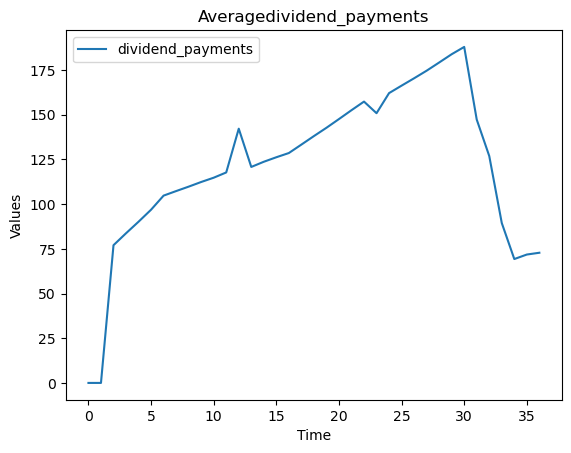

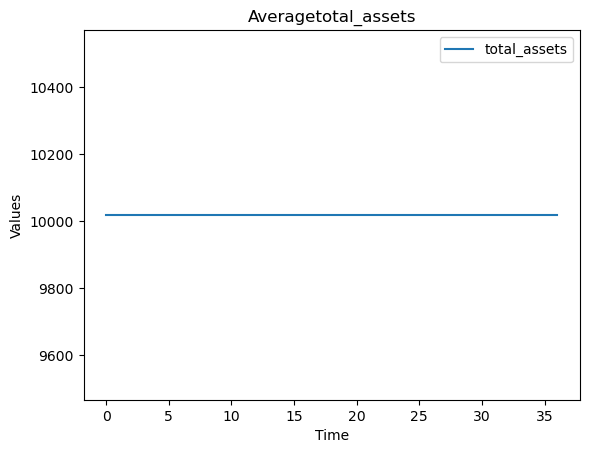

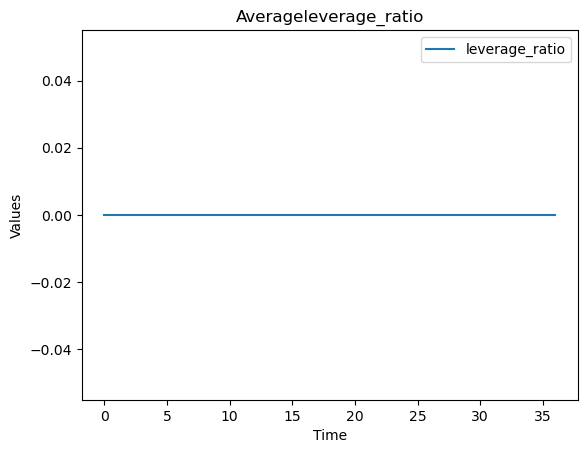

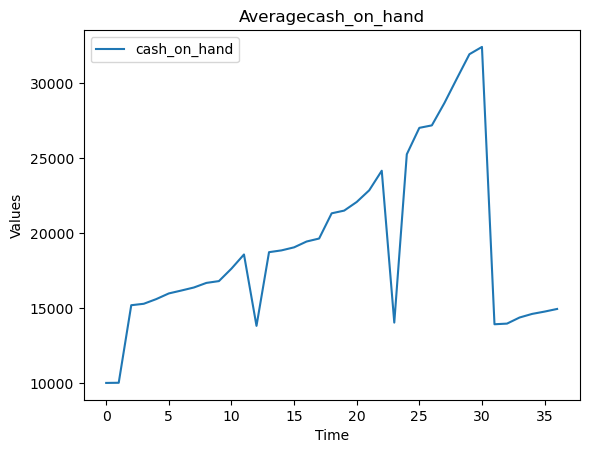

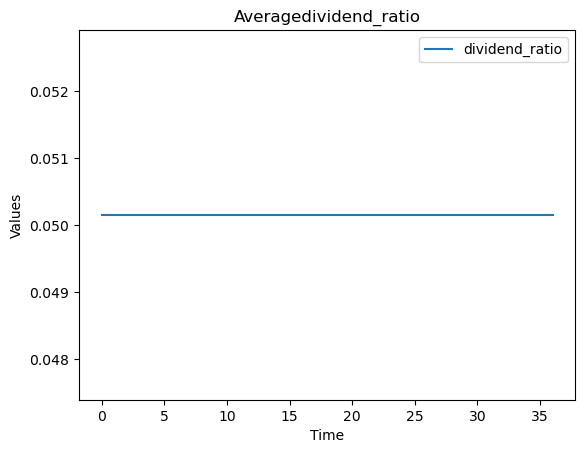

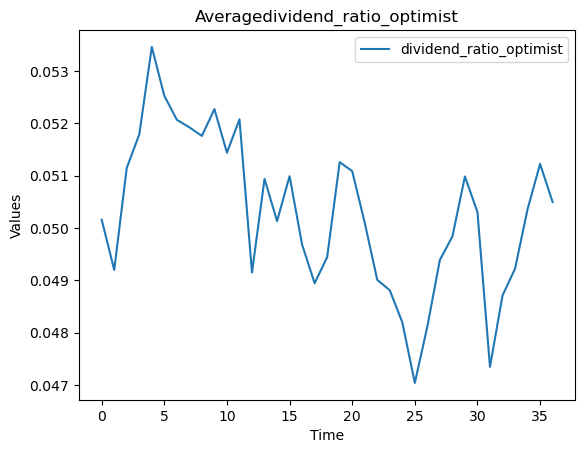

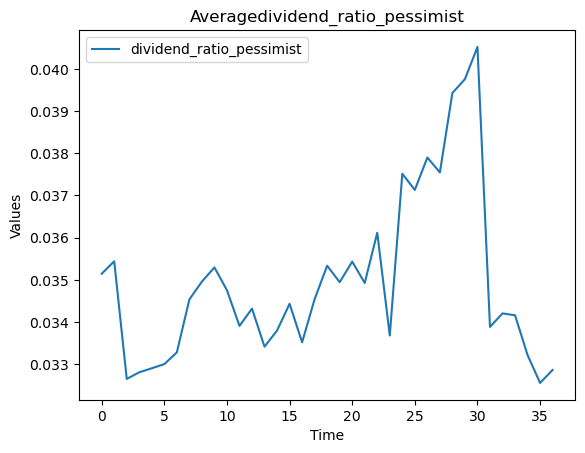

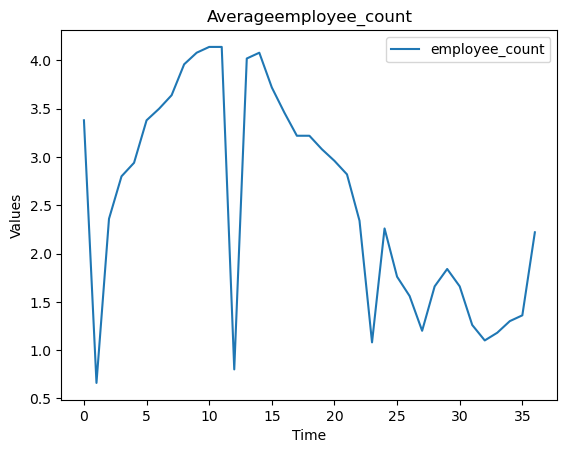

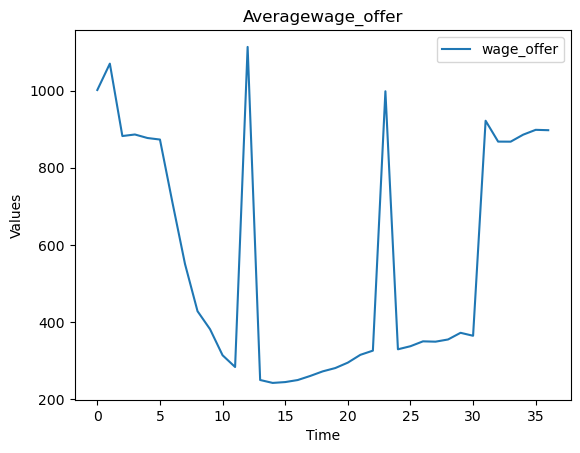

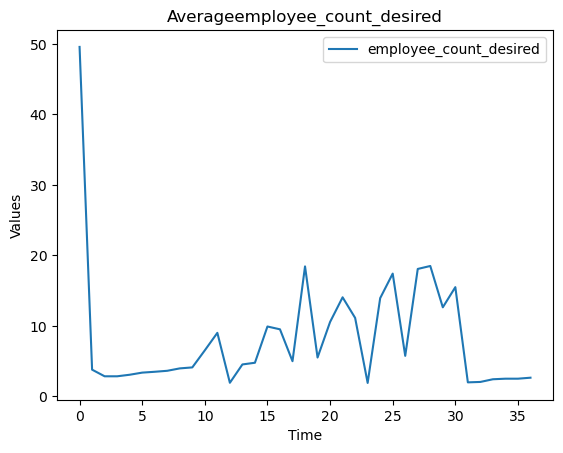

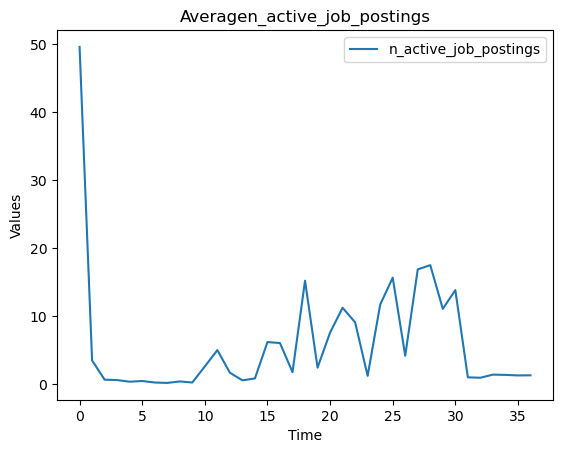

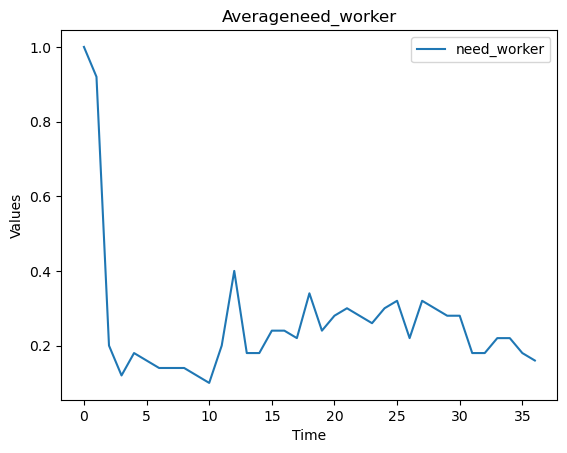

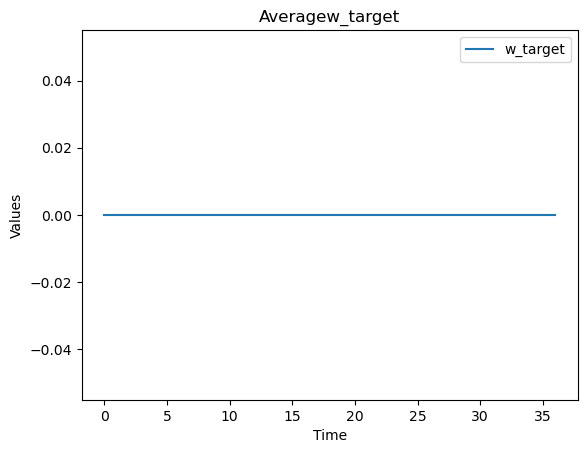

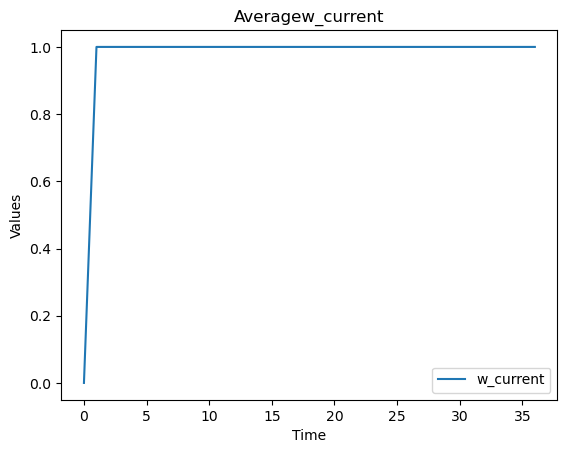

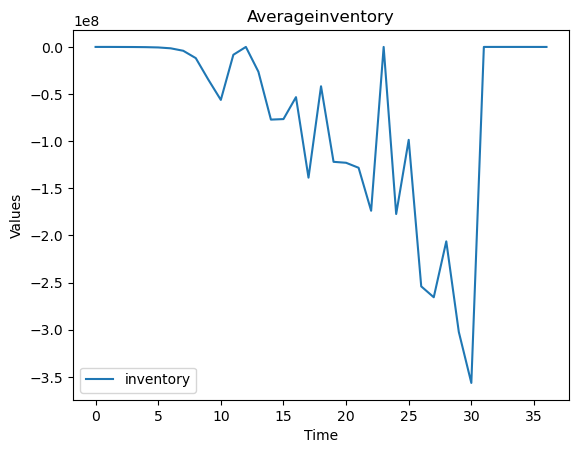

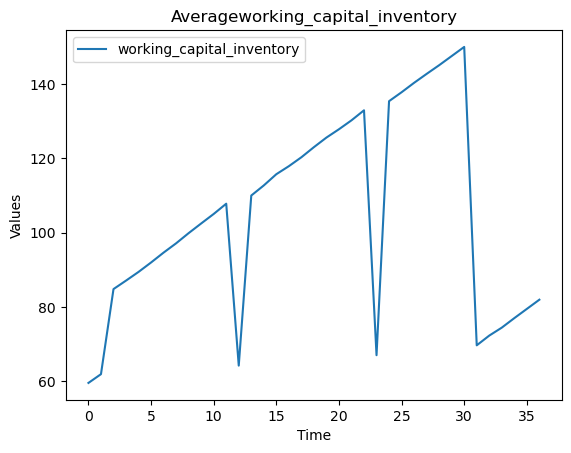

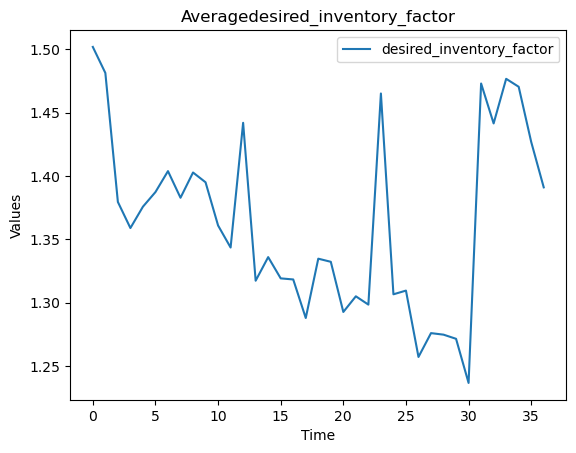

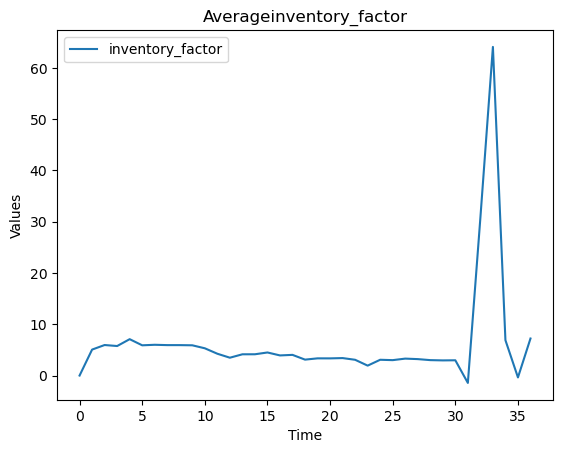

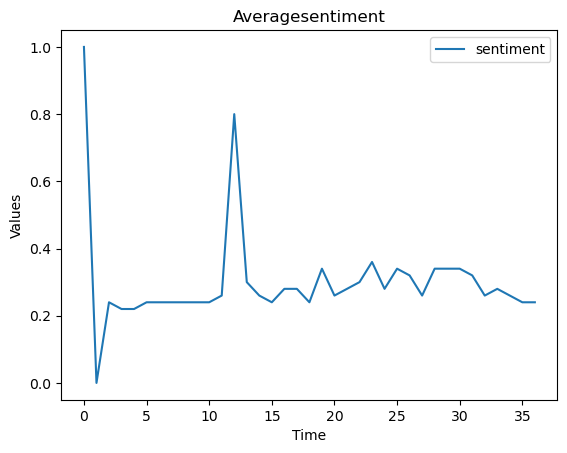

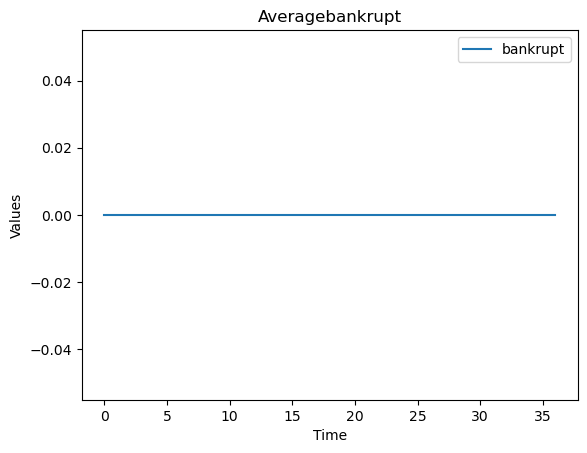

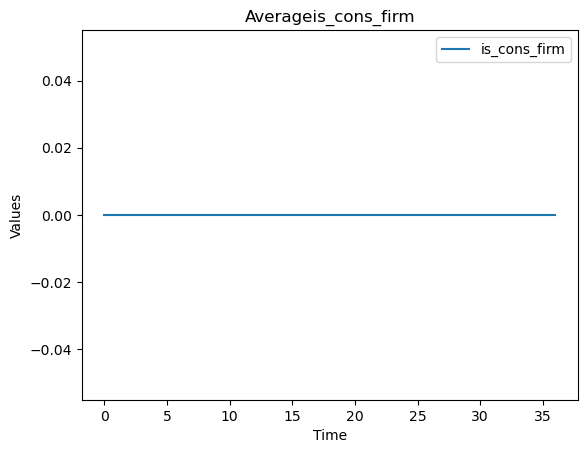

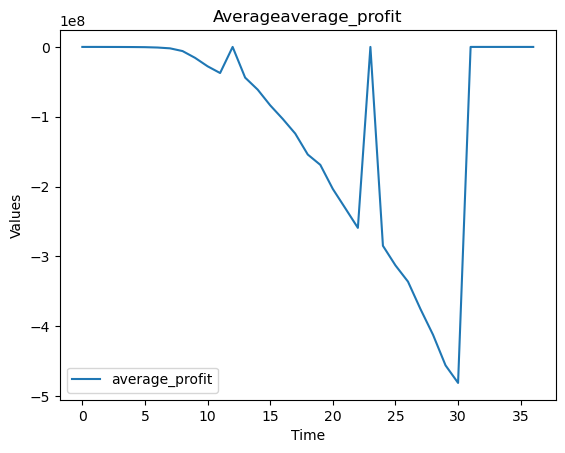

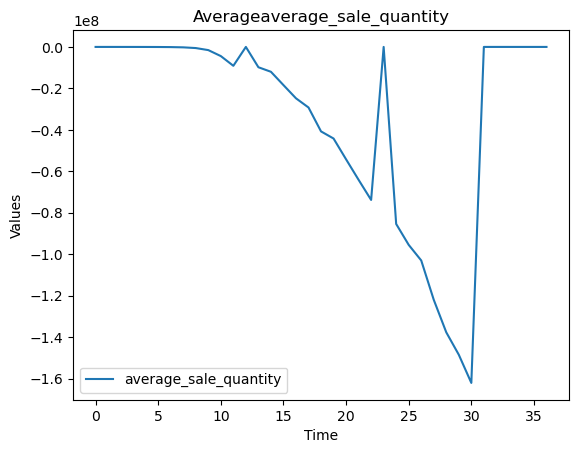

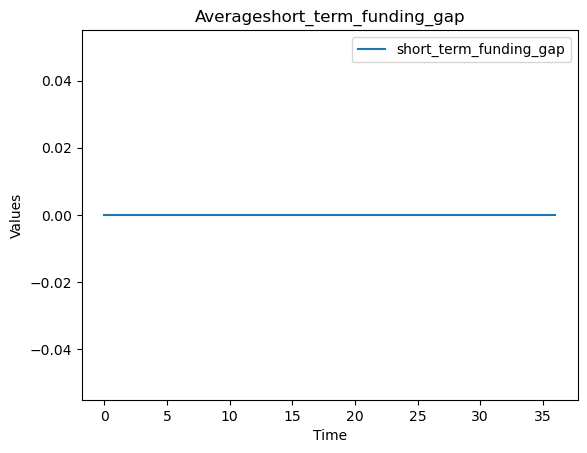

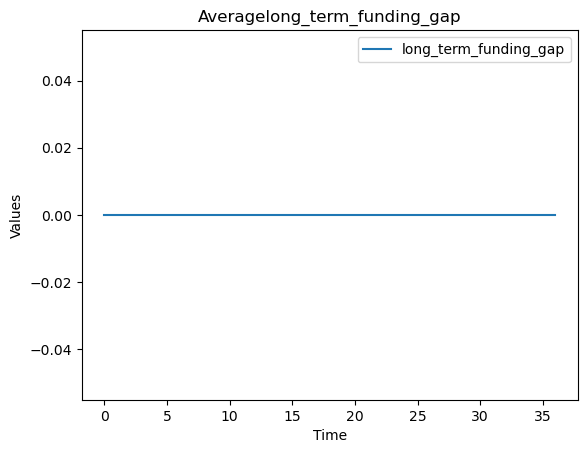

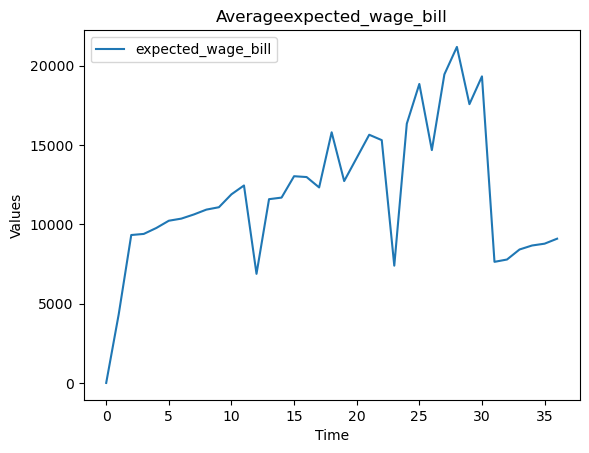

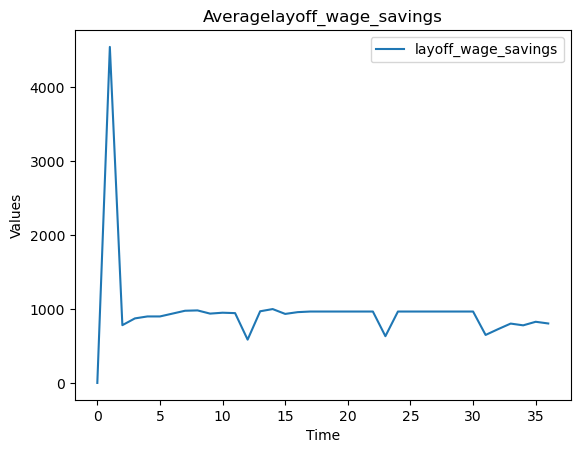

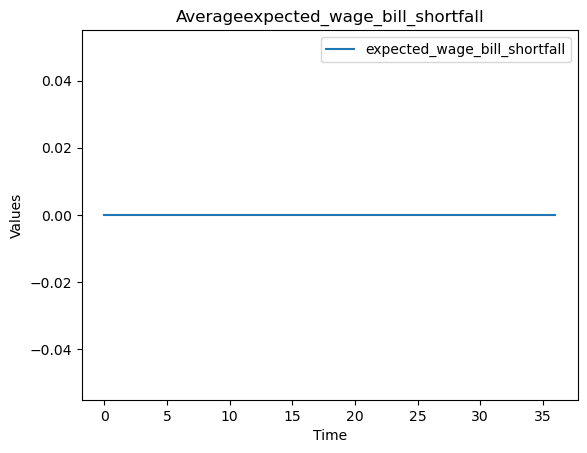

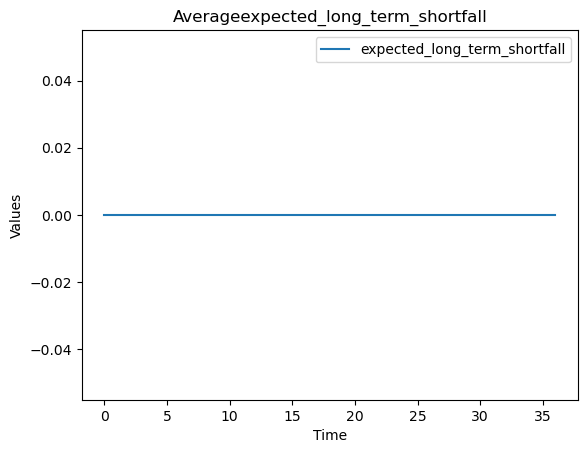

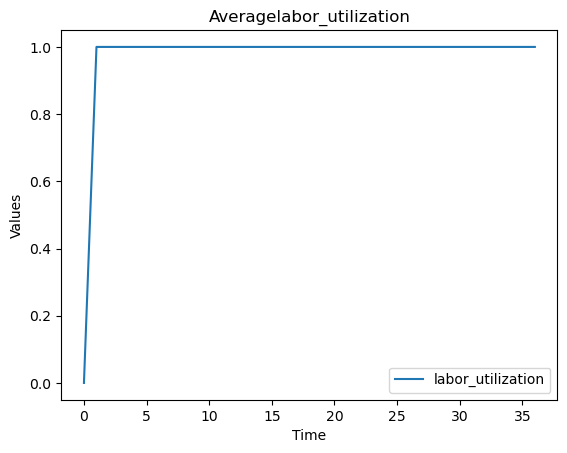

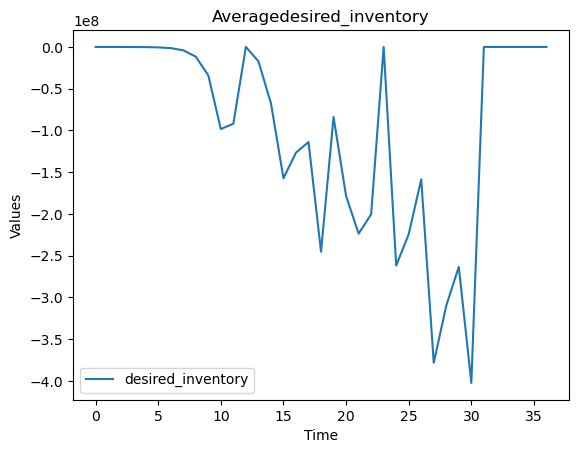

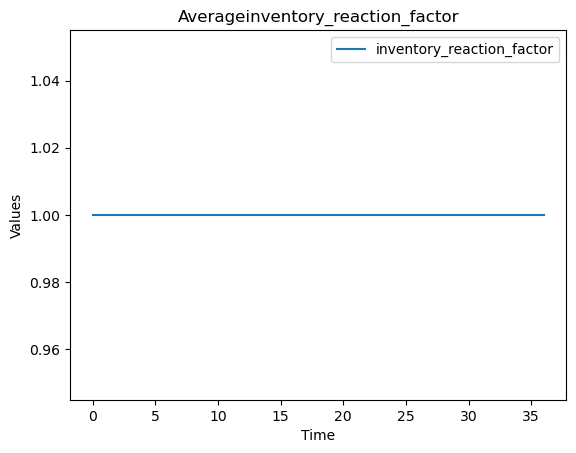

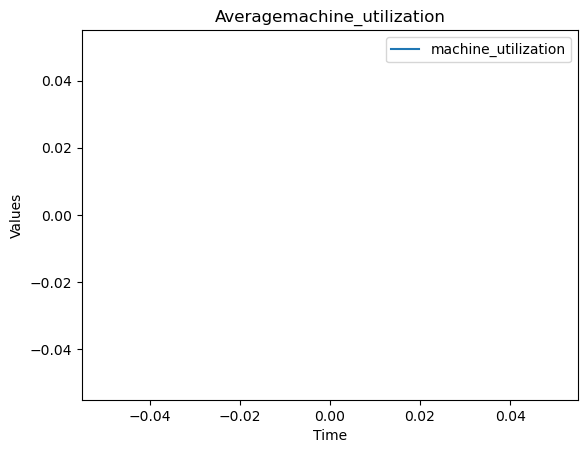

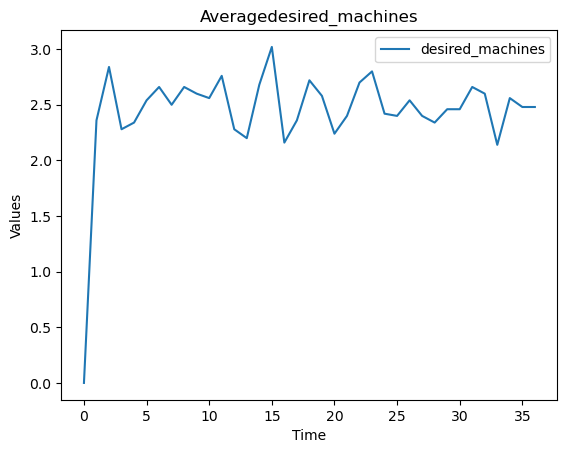

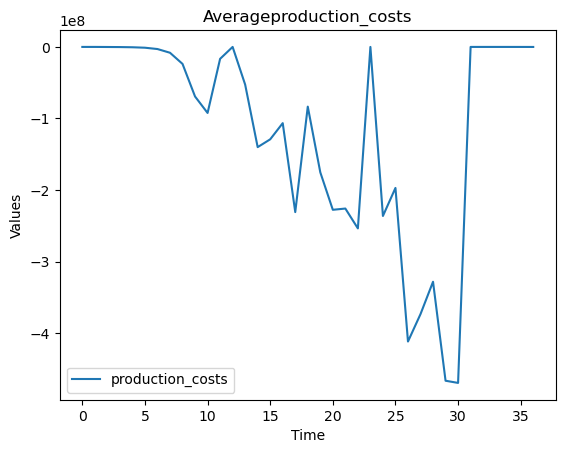

In [50]:

for column in average_cols:
    plt.plot(t, cap_firms_average[column], label=column)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(f"Average{column}")
    plt.legend()
    plt.show()